# **i. Introduction**

Name: Stanly Sukmajaya

Batch: RMT-036

Dataset: [remote-work-and-mental-health](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health/data)

Dataset Description: This dataset contains information about employees' data in regards to their work location (remote, hybrid, or onsite), their job, their location, their physical & mental health, and their stress level. Their overall condition will impact mental health and stress level.

HuggingFace url: https://huggingface.co/spaces/stanlys96/Hacktiv8_Milestone_2

# **ii. Background**

Remote work is something that is quite new to our world. Back then, when people discuss about work, they automatically think that they need to go to the office, or on site workplaces that require them to be there in person. However, the world has changed, and right now we are seeing one of the biggest shifts in how we work, ever. More and more jobs do not require workers to be on site anymore, and employees can literally work anywhere in the world, all they need is a laptop and a phone. With this shift in how we work, a lot of companies are not really sure how to provide the best work environment, without reducing the employee's productivity and satisfaction, and so this dataset will help our company to provide the ideal work environment.

**Problem**  

Remote work is something that we see grow everyday. However, the metrics of productivity, and how satisfied the employees are with this new work setting is still being researched. 

There are several problems/key issues that every company which has this work setting need to discuss:  
- Burnout and Mental Health Challenges. [reference](https://myhours.com/articles/the-impact-of-remote-work-burnout-statistics-causes-and-effective-solutions)
- Decreased Job Satisfaction. [reference](https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2023.1193854/full)
- Communication and Collaboration Issues. A 2022 Buffer report highlighted that 17% of remote workers experienced difficulties with collaboration and communication, leading to uncertainty and work-related stress, which can contribute to burnout. [reference](https://myhours.com/articles/the-impact-of-remote-work-burnout-statistics-causes-and-effective-solutions)
- Impact on Younger Employees. A survey by CivicScience revealed that remote workers, especially those from Gen Z, reported higher levels of job unhappiness compared to their on-site counterparts. [reference](https://civicscience.com/remote-workers-report-more-job-unhappiness-especially-gen-z/)
- Challenges with Return-to-Office Policies. [reference](https://www.news.com.au/finance/work/at-work/three-quarters-of-amazon-workers-looking-for-another-job-after-huge-wfh-call/news-story/a1509c0029171754245aeb0cb1a6e5f4?utm_source=chatgpt.com)

**Goal**

The goal is to provide the best work environment for our employees, so that productivity, communication & collaboration and employees satisfaction do not decrease, instead they increase, and employees give better performances for the company.

**Objective**

To develop a predictive model that can predict whether an employee, with his/her current conditions will have a low/medium/high stress level.

**Problem Breakdown**

1. Do remote work and access to mental health resources contribute to employees feeling socially isolated?
2. Does work location (hybrid, remote or onsite) has correlation with productivity change and mental health condition?

# **iii. Import Libraries**

Importing all libraries that will be used in this notebook.

In [2271]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # turn off warning
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler # numerical feature scaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # categorical feature encoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score # to split the dataset to train and test
from sklearn.compose import ColumnTransformer # Pipeline
from imblearn.pipeline import Pipeline # Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Model Inference
import pickle # save model
import json # save cols

# **iv. Data Loading**

In [2272]:
data_original = pd.read_csv("data.csv")
df = data_original.copy()

# Show first 5 rows of the data
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [2273]:
# Check dataset using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

There are 7 columns of `int64` type:
- `Age`: The age of the employee
- `Years_of_Experience`: How many years of experience the employee has
- `Hours_Worked_Per_Week`: How many hours does the employee work per week
- `Number_of_Virtual_Meetings`: How many virtual meetings the employee has per week
- `Work_Life_Balance_Rating`: How balanced is the employee's work and life. The number ranges from 1 to 5. 1 means poor balance, 2 and 3 means moderately balanced, 4 and 5 means good balance.
- `Social_Isolation_Rating`: A self-reported rating (1 to 5) on how isolated they feel.
- `Company_Support_for_Remote_Work`: How much does the company support remote working. The number ranges from 1 to 5. 1 means low support, 2 and 3 means moderately supported, 4 and 5 means highly supported.

13 columns of `object` type:
- `Employee_ID`: The unique ID of the employee. There are no duplicates of Employee_ID.
- `Gender`: The gender of the employee. There are 4 values: Male, Female, Non-binary and Prefer not to say.
- `Job_Role`: Current role of the employee.
- `Industry`: The industry the employee works in.
- `Work_Location`: Whether the employee works remotely, hybrid or onsite.
- `Stress_Level`: The employee's self-reported level of stress. There are 3 values: low, medium and high.
- `Mental_Health_Condition`: Mental health condition reported by the employee. There are 3 values: anxiety, depression and burnout.
- `Access_to_Mental_Health_Resources`: Whether the employee has access to mental health resources or not (Yes/No).
- `Productivity_Change`: Whether the employee has his/her productivity changed or not. There are 3 values: decrease, increase, no change.
- `Satisfaction_with_Remote_Work`: How satisfied they are with remote work arrangements (Satisfied, Neutral, Unsatisfied)
- `Physical_Activity`: How often does the employee do physical activities (Weekly, daily).
- `Sleep_Quality`: The sleep quality of the employee. It has 3 values: poor, good, average.
- `Region`: The region in which the employee resides.

**Check duplicates in the dataset**

Check for duplicates. We will drop if there is any.

In [2274]:
df.duplicated().sum()

np.int64(0)

There are no duplicates.

**Check for missing values in the dataset**

In [2275]:
df.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

There are 1196 missing values for `Mental_Health_Condition` and 1629 missing values for `Physical_Activity`. Let's investigate this.

In [2276]:
# Color palettes for later use, for the pie charts
color_palettes = [
    ['lightgreen', 'orange', 'lightblue', 'purple', 'pink', 'yellow', 'red'],    # Colors for the first pie chart
    ['cyan', 'magenta', 'grey', 'lightcoral', 'lightblue', 'gold', 'lightgreen'],      # Colors for the second pie chart
    ['lightyellow', 'violet', 'tan', 'salmon', 'lavender', 'teal', 'brown'],     # Colors for the third pie chart
    ['skyblue', 'coral', 'limegreen', 'slategray', 'orchid', 'crimson', 'khaki']  # Colors for the fourth pie chart
]

Investigating the rows with missing `Mental_Health_Condition` values.

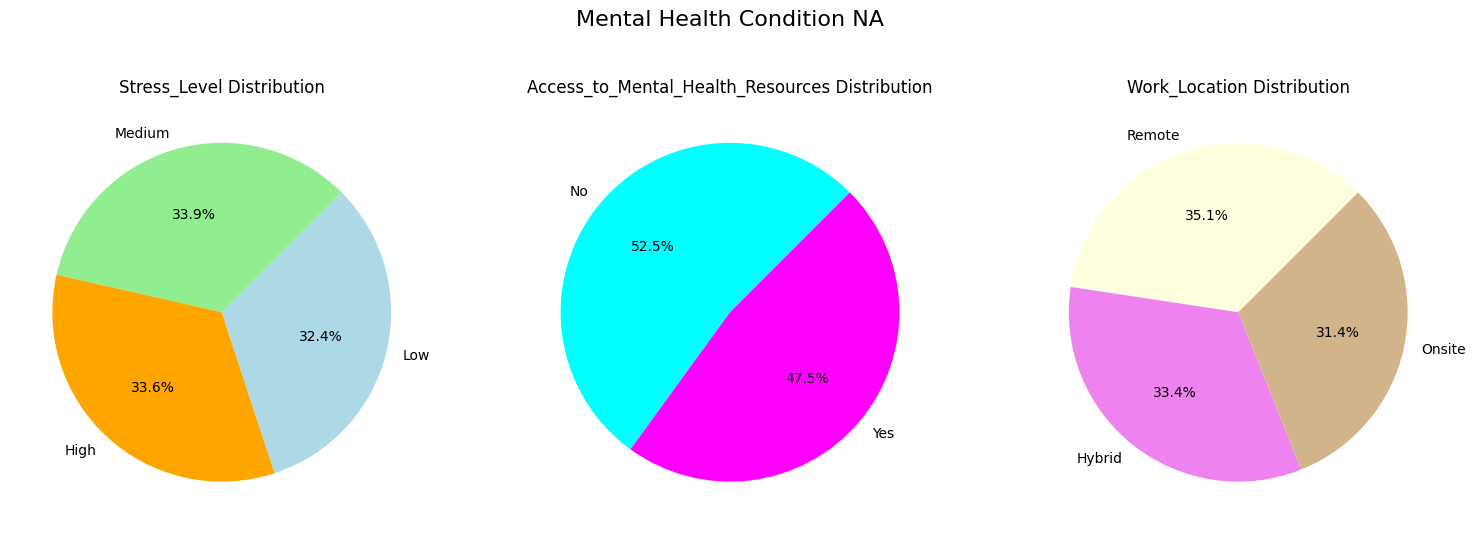

In [2277]:
mental_health_na = df[df["Mental_Health_Condition"].isna()]
cols_to_investigate = ["Stress_Level", "Access_to_Mental_Health_Resources", "Work_Location"]
# Create subplots for the pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for index, the_col in enumerate(cols_to_investigate):
    the_count = mental_health_na[the_col].value_counts()

    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=45, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Mental Health Condition NA', fontsize=16)

# Show the charts
plt.show()

There does not seem to be any kind of pattern here that can explain the missing values of `Mental_Health_Condition`.

Investigating the rows with missing `Physical_Activity` values.

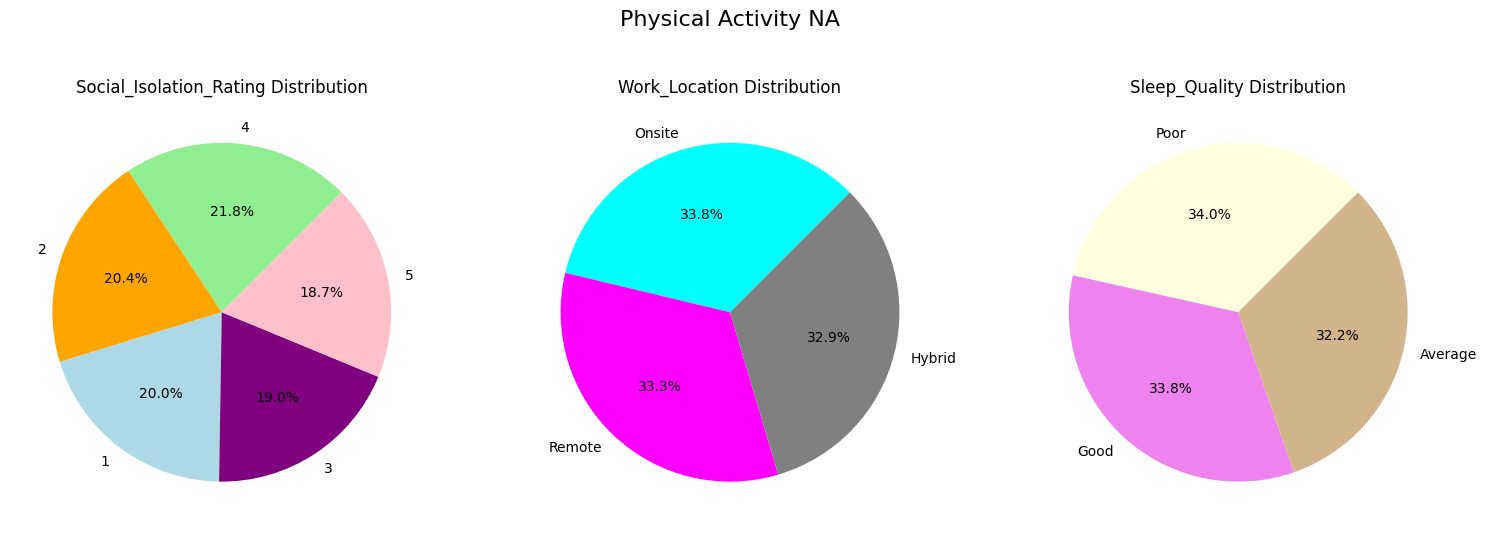

In [2278]:
physical_activity_na = df[df["Physical_Activity"].isna()]
cols_to_investigate = ["Social_Isolation_Rating", "Work_Location", "Sleep_Quality"]
# Create subplots for the pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for index, the_col in enumerate(cols_to_investigate):
    the_count = physical_activity_na[the_col].value_counts()

    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=45, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Physical Activity NA', fontsize=16)

# Show the charts
plt.show()

There does not seem to be any kind of pattern here that can explain the missing values of `Physical_Activity`.

Let's check the unique values of `Mental_Health_Condition` and `Physical_Activity`.

In [2279]:
print(f"Mental_Health_Condition unique values: {df['Mental_Health_Condition'].unique().tolist()}")
print(f"Physical_Activity unique values: {df['Physical_Activity'].unique().tolist()}")

Mental_Health_Condition unique values: ['Depression', 'Anxiety', nan, 'Burnout']
Physical_Activity unique values: ['Weekly', nan, 'Daily']


As can be seen from the unique values above, `Mental_Health_Condition` seems to have all negative values, and `Physical_Activity` seems to have all positive values. From this, we will conclude to fill the missing values of `Mental_Health_Condition` with "Normal" as in meaning that the employee does not have negative mental health condition, and `Physical_Activity` with "None" as in meaning that the employee does not do any kind of physical activities.

In [2280]:
df["Mental_Health_Condition"].fillna("Normal", inplace=True)
df["Physical_Activity"].fillna("None", inplace=True)

In [2281]:
# Re-check missing values
df.isna().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [2282]:
df.shape

(5000, 20)

**The final summary of our dataset**:
- There are 7 integer and 13 object columns
- The final shape is: 5000 rows × 20 columns

- Numerical column = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
- Categorical nominal = ['Employee_ID', 'Gender', 'Job_Role', 'Industry', 'Work_Location', 'Access_to_Mental_Health_Resources', 'Region']
- Categorical ordinal = ['Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Mental_Health_Condition', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality']
- Our target = ['Stress_Level']

Lastly, we will create some more columns to make our visualisation more meaningful. We will create category columns for our numerical features. Each numerical column will have its categorical column, with each has 3 different categories.

In [2283]:
# Function to categorize age into 3 groups
def categorize_age(age):
    if 20 <= age <= 34:
        return 'Young adults (20-34)'
    elif 35 <= age <= 49:
        return 'Mid-career adults (35-49)'
    elif age >= 50:
        return 'Senior adults (50+)'
    else:
        return 'Unknown'
    
# Function to categorize years of experience into 3 groups
def categorize_experience(years):
    if 0 <= years <= 10:
        return 'Early career (0-10 years)'
    elif 11 <= years <= 20:
        return 'Mid-career (11-20 years)'
    elif years >= 21:
        return 'Senior career (21+ years)'
    else:
        return 'Unknown'
    
# Function to categorize hours worked into 3 groups
def categorize_hours(hours):
    if 0 <= hours <= 30:
        return 'Part-time (0-30 hours)'
    elif 31 <= hours <= 45:
        return 'Full-time (31-45 hours)'
    elif hours >= 46:
        return 'Overtime (46+ hours)'
    else:
        return 'Unknown'

# Function to categorize social isolation rating into 3 groups
def categorize_isolation(rating):
    if rating == 1:
        return 'Low Isolation (1)'
    elif rating in [2, 3]:
        return 'Moderate Isolation (2-3)'
    elif rating in [4, 5]:
        return 'High Isolation (4-5)'
    else:
        return 'Unknown'
    
# Function to categorize work-life balance rating into 3 groups
def categorize_work_life_balance(rating):
    if rating == 1:
        return 'Poor Balance (1)'
    elif rating in [2, 3]:
        return 'Moderate Balance (2-3)'
    elif rating in [4, 5]:
        return 'Good Balance (4-5)'
    else:
        return 'Unknown'
    
# Function to categorize company support rating into 3 groups
def categorize_company_support(rating):
    if rating == 1:
        return 'Poor Support (1)'
    elif rating in [2, 3]:
        return 'Moderate Support (2-3)'
    elif rating in [4, 5]:
        return 'Strong Support (4-5)'
    else:
        return 'Unknown'
    
# Function to categorize virtual meetings into 3 groups
def categorize_meetings(meetings):
    if 0 <= meetings <= 5:
        return 'Low Meetings (0-5)'
    elif 6 <= meetings <= 10:
        return 'Moderate Meetings (6-10)'
    elif meetings >= 11:
        return 'High Meetings (11+)'
    else:
        return 'Unknown'

In [2284]:
# Apply the function to create a new column
df['Age_Group'] = df['Age'].apply(categorize_age)
df['Years_of_Experience_Group'] = df['Years_of_Experience'].apply(categorize_experience)
df['Hours_Worked_Group'] = df['Hours_Worked_Per_Week'].apply(categorize_hours)
df['Social_Isolation_Group'] = df['Social_Isolation_Rating'].apply(categorize_isolation)
df['Work_Life_Balance_Group'] = df['Work_Life_Balance_Rating'].apply(categorize_work_life_balance)
df['Company_Support_Remote_Work_Group'] = df['Company_Support_for_Remote_Work'].apply(categorize_company_support)
df['Virtual_Meetings_Group'] = df['Number_of_Virtual_Meetings'].apply(categorize_meetings)

# **v. Exploratory Data Analysis (EDA)**

Here, we will do exploratory data analysis to understand the data better, what can we get from the data, and lastly to see if we need to do extra step to extract more information in the Feature Engineering step.

We will categorize our columns based on common features:
- `Demographics`: Age_Group, Gender, Region
- `Jobs`: Job_Role, Industry, Years_of_Experience_Group
- `Work conditions`: Work_Location, Hours_Worked_Group, Work_Life_Balance_Group, Company_Support_Remote_Work_Group, Virtual_Meetings_Group, Satisfaction_with_Remote_Work, Productivity_Change
- `Mental health`: Mental_Health_Condition, Access_to_Mental_Health_Resources, Stress_Level, Social_Isolation_Group
- `Physical health`: Physical_Activity, Sleep_Quality

In [2285]:
demographics_cols = ['Age_Group', 'Gender', 'Region']
job_cols = ['Job_Role', 'Industry', 'Years_of_Experience_Group']
work_condition_cols = ['Hours_Worked_Group', 'Work_Life_Balance_Group', 'Company_Support_Remote_Work_Group', 'Virtual_Meetings_Group', 'Work_Location',  'Satisfaction_with_Remote_Work', 'Productivity_Change']
mental_health_cols = ['Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Stress_Level', 'Social_Isolation_Group']
physical_health_cols = ['Physical_Activity', 'Sleep_Quality']

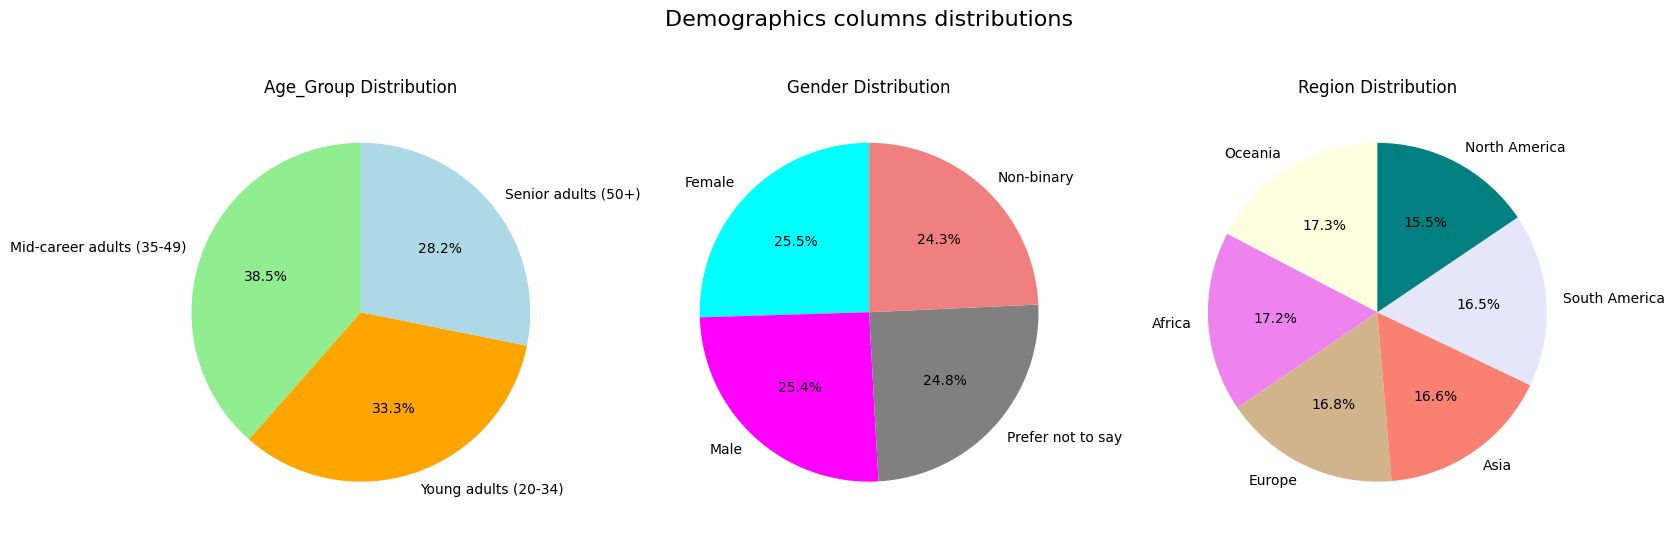

In [2286]:
# Create subplots for the pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for index, the_col in enumerate(demographics_cols):
    the_count = df[the_col].value_counts()

    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Demographics columns distributions', fontsize=16)

# Show the charts
plt.show()

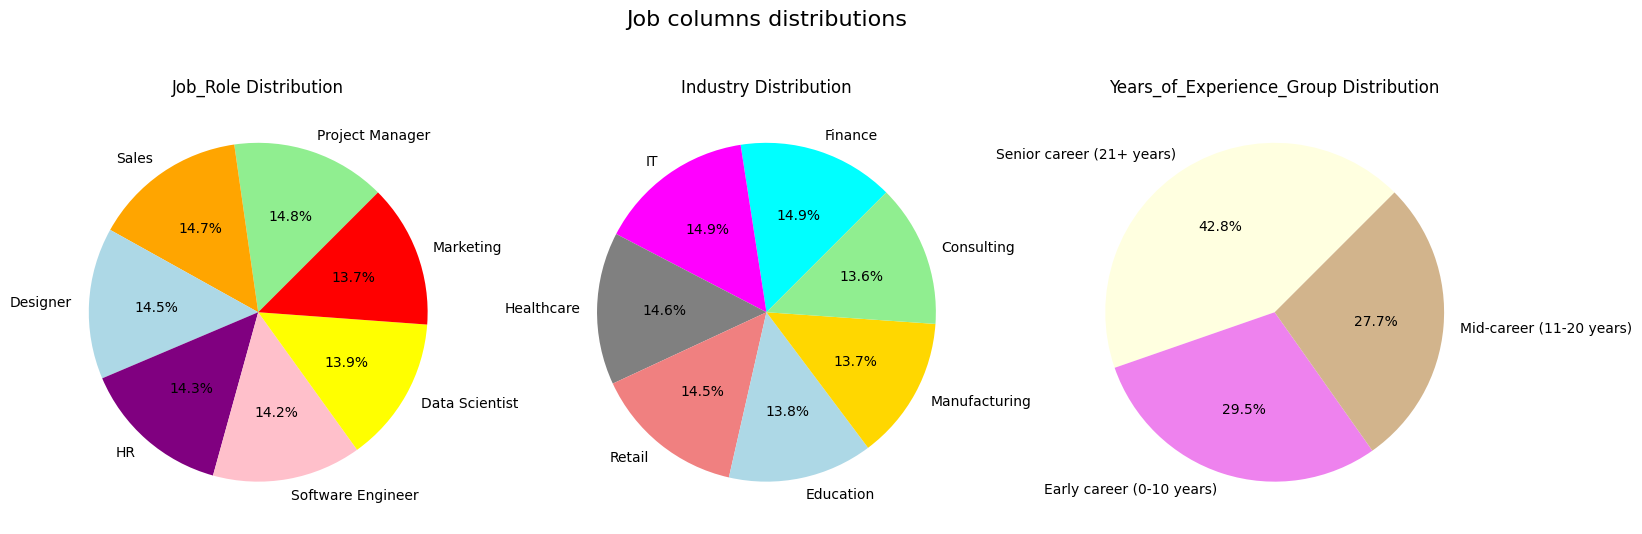

In [2287]:
# Create subplots for the pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for index, the_col in enumerate(job_cols):
    the_count = df[the_col].value_counts()

    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=45, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Job columns distributions', fontsize=16)

# Show the charts
plt.show()

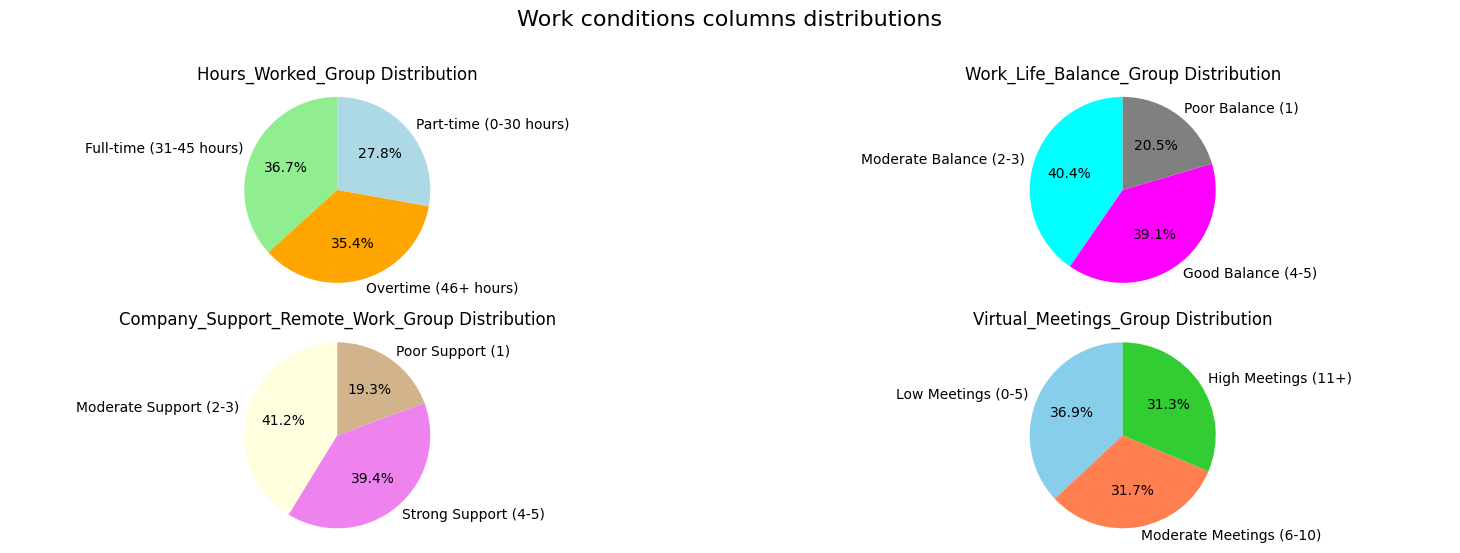

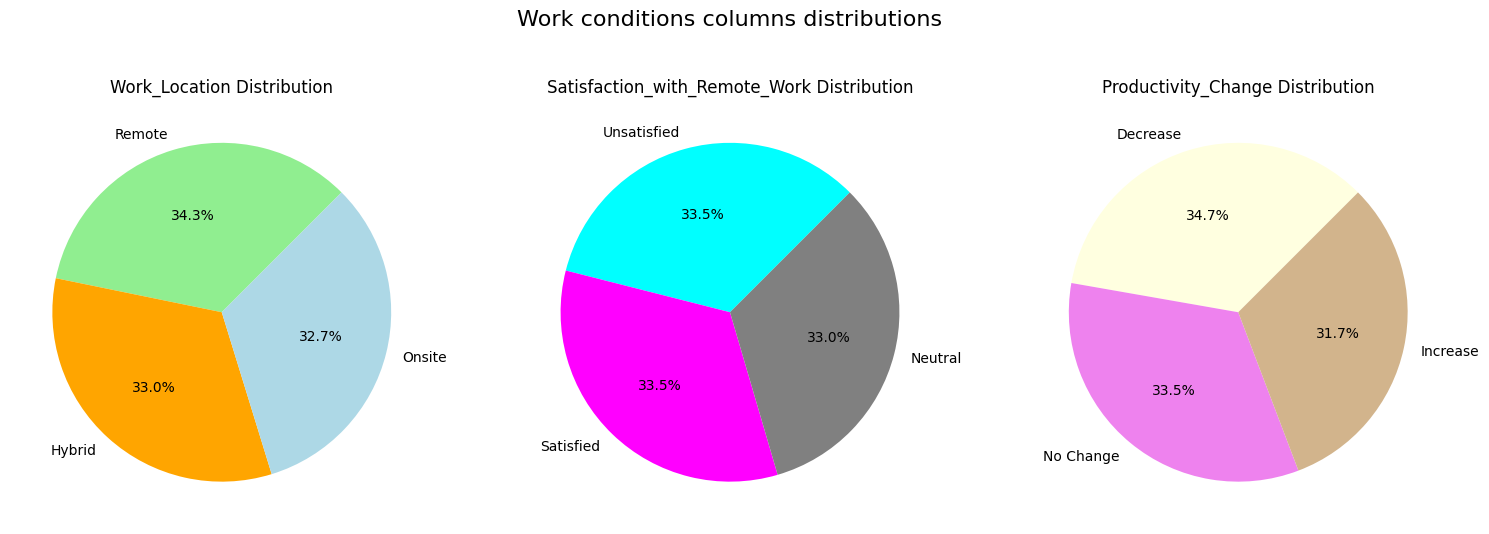

In [2288]:
# Create subplots for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(18, 6))
axs = axs.flatten()
for index, the_col in enumerate(work_condition_cols[:4]):
    the_count = df[the_col].value_counts()

    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    axs[index].axis('equal')
    plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Work conditions columns distributions', fontsize=16)

# Show the charts
plt.show()

# Create subplots for the pie charts
fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs = axs.flatten()
for index, the_col in enumerate(work_condition_cols[4:]):
    the_count = df[the_col].value_counts()

    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=45, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    plt.tight_layout()

# axs[3].remove()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Work conditions columns distributions', fontsize=16)

# Show the charts
plt.show()

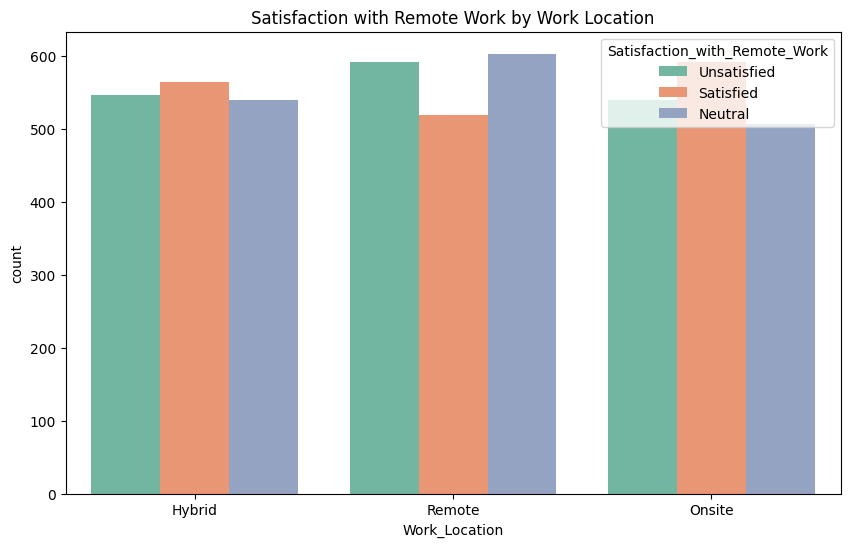

In [2289]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Satisfaction_with_Remote_Work', palette='Set2')
plt.title('Satisfaction with Remote Work by Work Location')
plt.show()

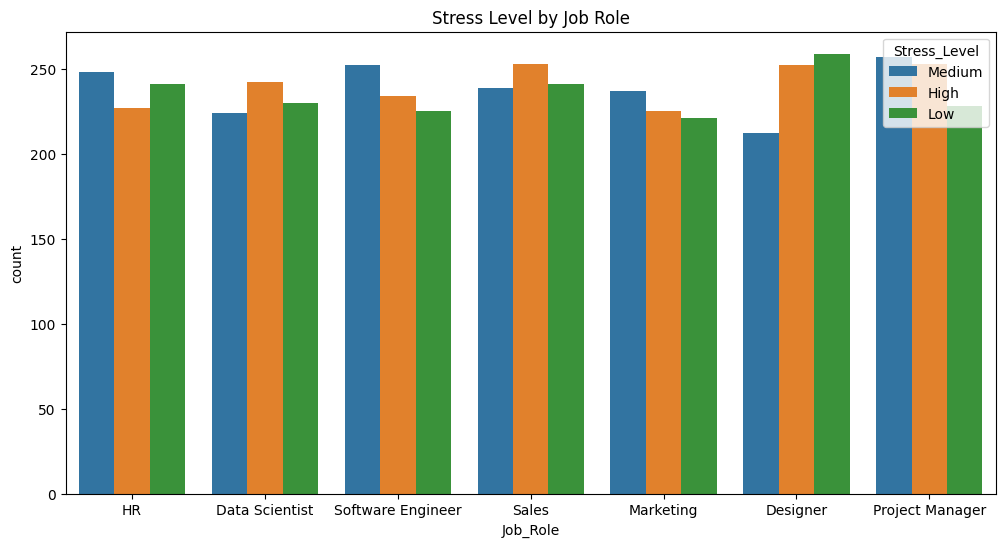

In [2290]:
plt.figure(figsize=(12,6))
sns.countplot(x='Job_Role',hue='Stress_Level',data=data_original)
plt.title('Stress Level by Job Role')
plt.show()

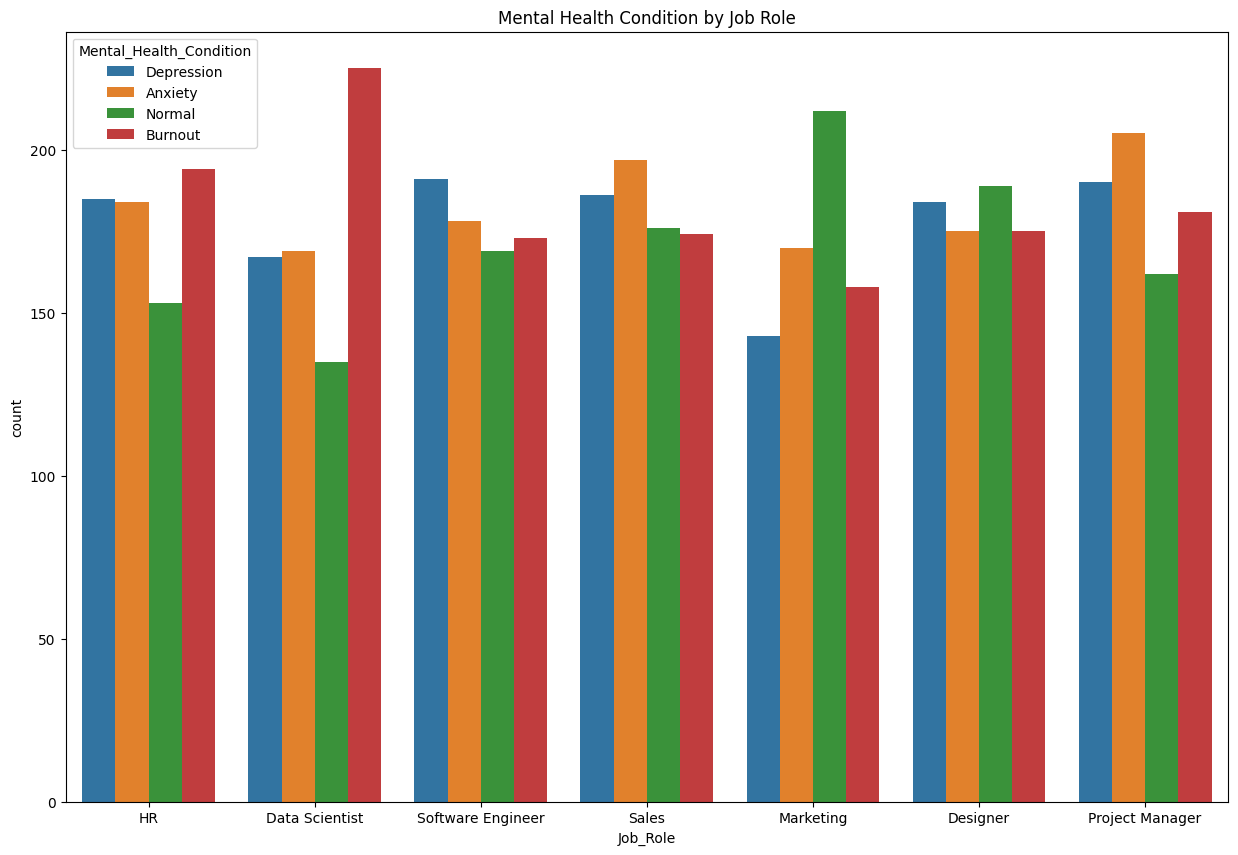

In [2291]:
plt.figure(figsize=(15,10))
sns.countplot(x='Job_Role', hue='Mental_Health_Condition', data=df)
plt.title('Mental Health Condition by Job Role')
plt.show()

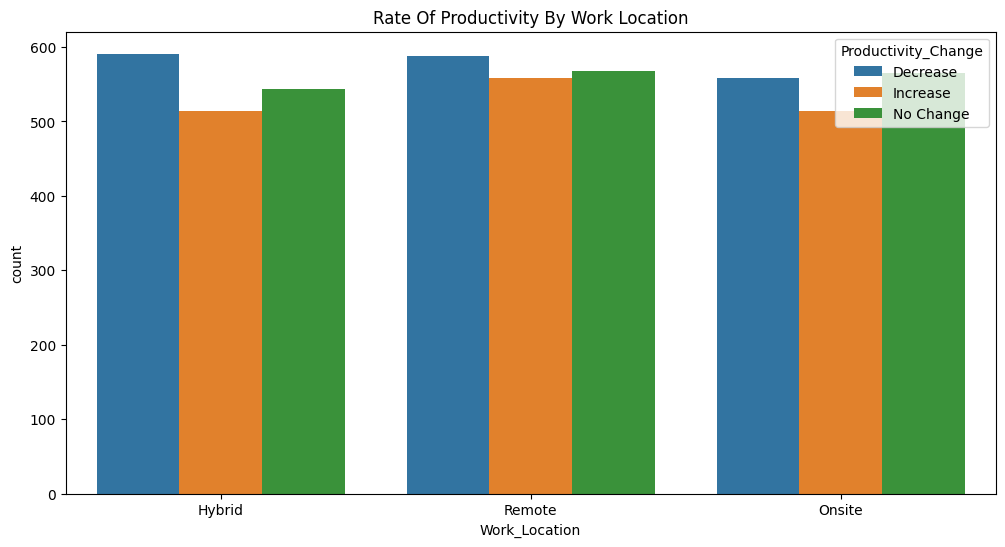

In [2292]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change')
plt.title('Rate Of Productivity By Work Location')
plt.show()

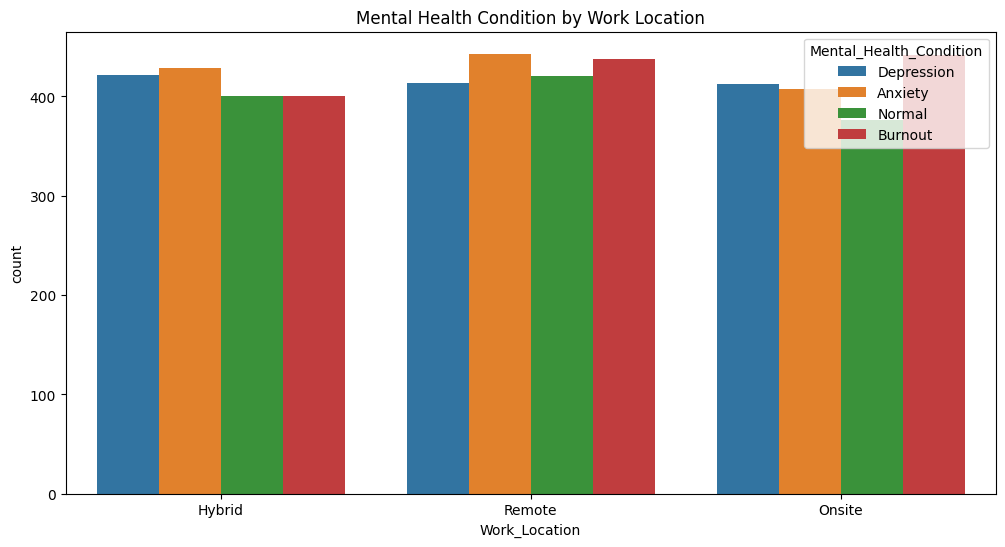

In [2293]:
plt.figure(figsize=(12,6))
sns.countplot(x='Work_Location',hue='Mental_Health_Condition',data=df)
plt.title('Mental Health Condition by Work Location')
plt.show()

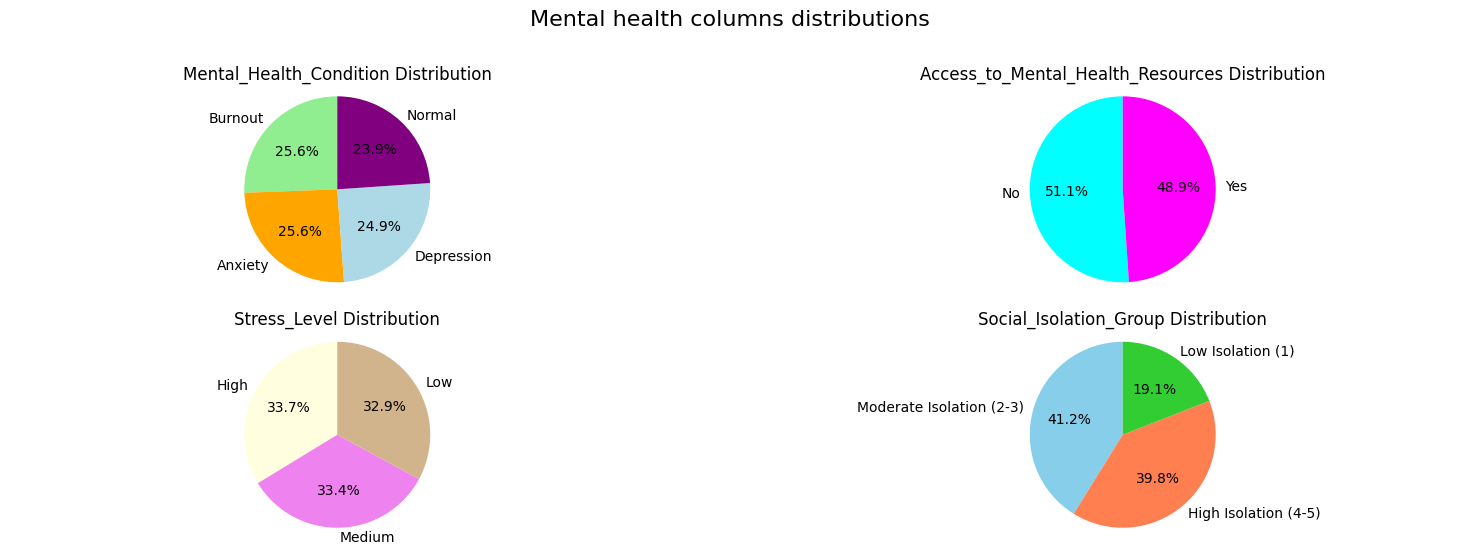

In [2294]:
# Create subplots for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(18, 6))
# Flatten the axs array for easier indexing
axs = axs.flatten()
for index, the_col in enumerate(mental_health_cols):
    the_count = df[the_col].value_counts()
    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    axs[index].axis('equal')
    plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Mental health columns distributions', fontsize=16)

# Show the charts
plt.show()

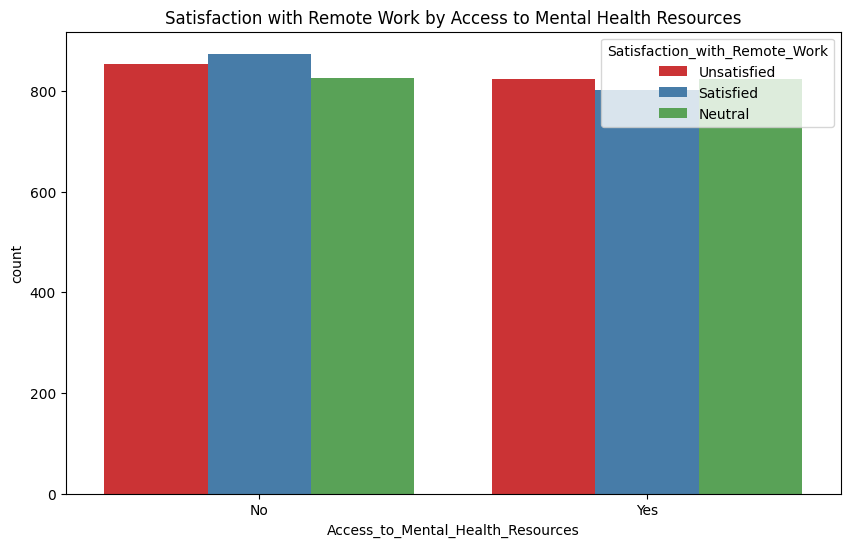

In [2295]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Access_to_Mental_Health_Resources', hue='Satisfaction_with_Remote_Work', palette='Set1')
plt.title('Satisfaction with Remote Work by Access to Mental Health Resources')
plt.show()

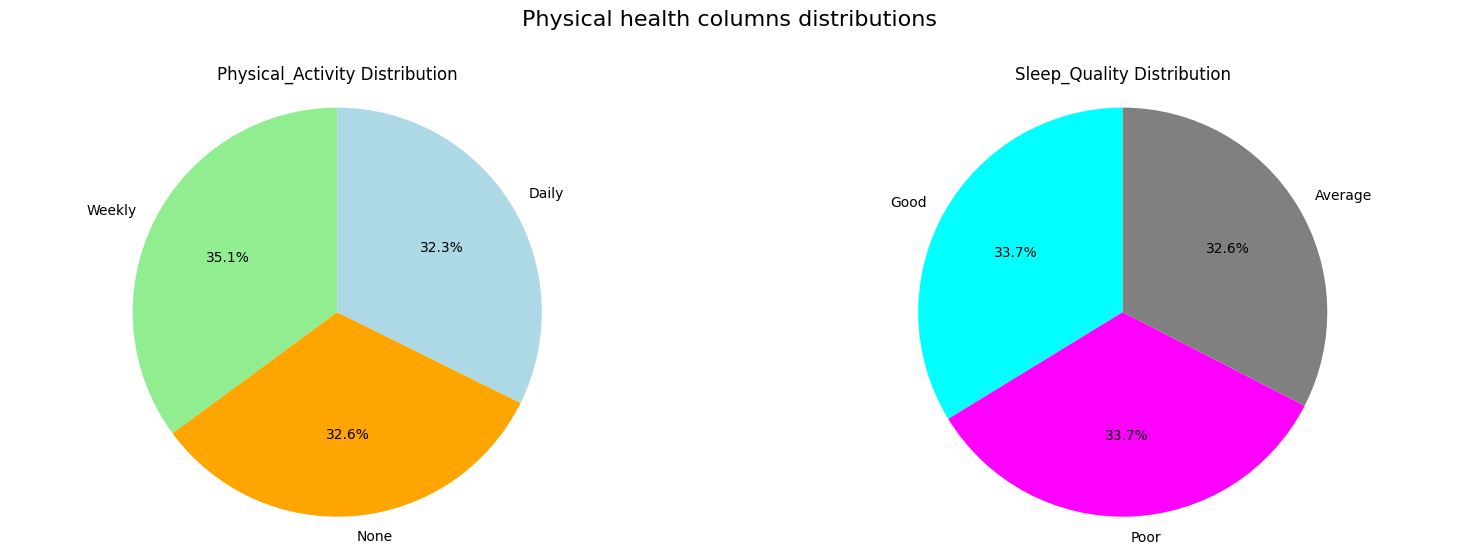

In [2296]:
# Create subplots for the pie charts
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
for index, the_col in enumerate(physical_health_cols):
    the_count = df[the_col].value_counts()

    colors = color_palettes[index] if index < len(color_palettes) else ['gray'] * len(the_count.index)
    
    axs[index].pie(the_count, labels=the_count.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[index].set_title(f'{the_col} Distribution')
    axs[index].axis('equal')
    plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)

fig.suptitle('Physical health columns distributions', fontsize=16)

# Show the charts
plt.show()

Answering the question: Do remote work and access to mental health resources contribute to employees feeling socially isolated?

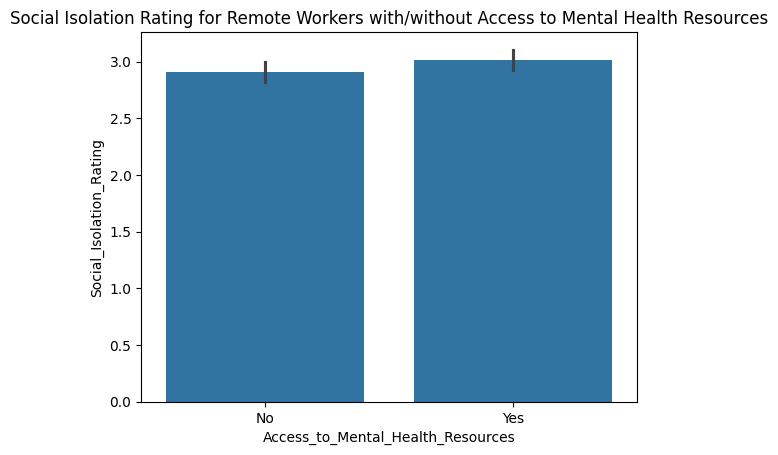

In [2297]:
# Plotting the bar plot for remote work location
sns.barplot(x='Access_to_Mental_Health_Resources', y='Social_Isolation_Rating', data=df[df["Work_Location"] == "Remote"])
plt.title('Social Isolation Rating for Remote Workers with/without Access to Mental Health Resources')
plt.show()

Answering the question: Does work location (hybrid, remote or onsite) has correlation with productivity change and mental health condition?

In [2298]:
# 1. Cross-tabulation for Work_Location vs Productivity_Change
ct_productivity = pd.crosstab(df['Work_Location'], df['Productivity_Change'])

# 2. Cross-tabulation for Work_Location vs Mental_Health_Condition
ct_mental_health = pd.crosstab(df['Work_Location'], df['Mental_Health_Condition'])

# Display cross-tabulation
print("Cross-tabulation between Work Location and Productivity Change:")
print(ct_productivity)

print("\nCross-tabulation between Work Location and Mental Health Condition:")
print(ct_mental_health)

# 3. Chi-square test for Work_Location vs Productivity_Change
productivity_result = chi2_contingency(ct_productivity)
print(f"\nChi-square test result for Work_Location vs Productivity_Change: p-value = {productivity_result.pvalue}")

# 4. Chi-square test for Work_Location vs Mental_Health_Condition
mental_health = chi2_contingency(ct_mental_health)
print(f"\nChi-square test result for Work_Location vs Mental_Health_Condition: p-value = {mental_health.pvalue}")

if productivity_result.pvalue < 0.05:
    print("\nThere is a significant relationship between Work_Location and Productivity_Change.")
else:
    print("\nNo significant relationship between Work_Location and Productivity_Change.")

if mental_health.pvalue < 0.05:
    print("There is a significant relationship between Work_Location and Mental_Health_Condition.")
else:
    print("No significant relationship between Work_Location and Mental_Health_Condition.")

Cross-tabulation between Work Location and Productivity Change:
Productivity_Change  Decrease  Increase  No Change
Work_Location                                     
Hybrid                    591       514        544
Onsite                    558       514        565
Remote                    588       558        568

Cross-tabulation between Work Location and Mental Health Condition:
Mental_Health_Condition  Anxiety  Burnout  Depression  Normal
Work_Location                                                
Hybrid                       428      400         421     400
Onsite                       407      442         412     376
Remote                       443      438         413     420

Chi-square test result for Work_Location vs Productivity_Change: p-value = 0.7081482208219014

Chi-square test result for Work_Location vs Mental_Health_Condition: p-value = 0.5985667674031616

No significant relationship between Work_Location and Productivity_Change.
No significant relationship betw

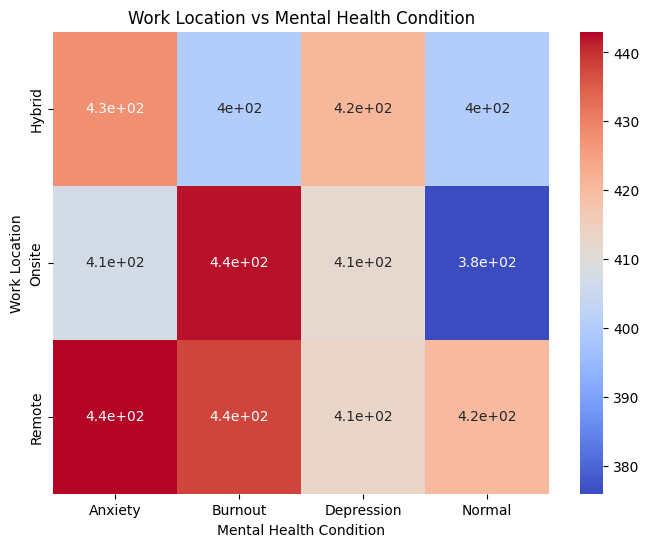

In [2299]:
plt.figure(figsize=(8, 6))
sns.heatmap(ct_mental_health, annot=True, cmap="coolwarm", cbar=True)
plt.title('Work Location vs Mental Health Condition')
plt.ylabel('Work Location')
plt.xlabel('Mental Health Condition')
plt.show()

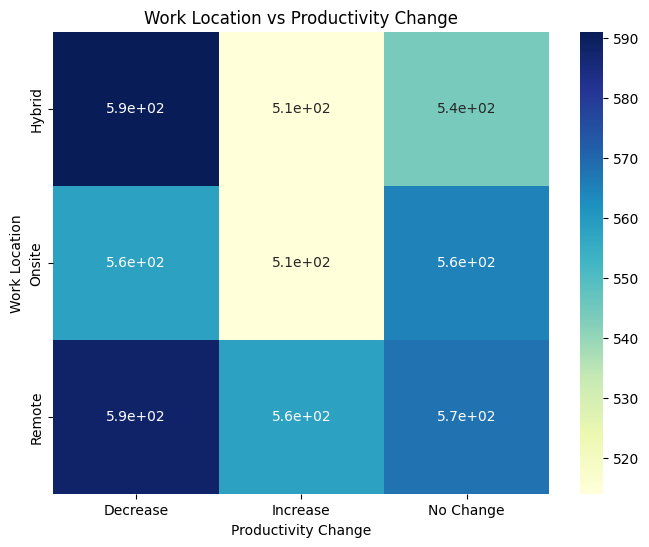

In [2300]:
work_vs_productivity = pd.crosstab(df['Work_Location'], df['Productivity_Change'])

# Plot a heatmap for Work_Location vs Productivity_Change
plt.figure(figsize=(8, 6))
sns.heatmap(work_vs_productivity, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Work Location vs Productivity Change')
plt.ylabel('Work Location')
plt.xlabel('Productivity Change')
plt.show()

Now we will look at the histogram of our numerical columns

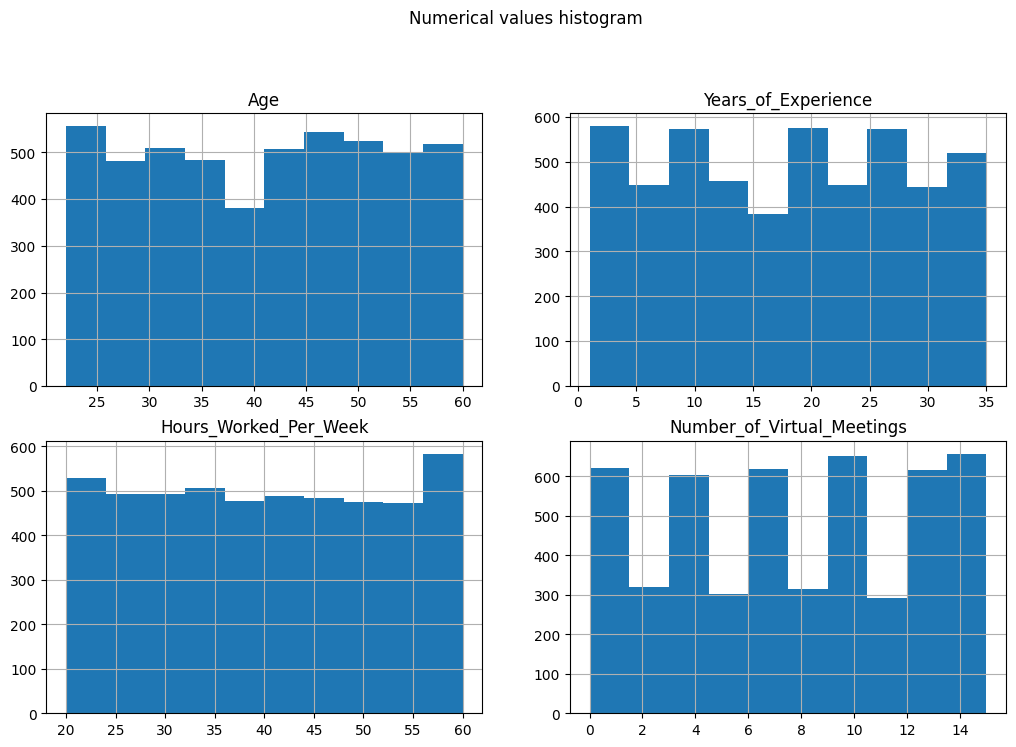

In [2301]:
numerical_columns = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
df[numerical_columns].hist(figsize=(12, 8))

# Show the plot
plt.tight_layout()  # Adjust layout
plt.suptitle("Numerical values histogram")
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1, wspace=0.2, hspace=0.2)
plt.show()

Looks like all of our numerical columns are normal.

Let's check the correlation between our numerical columns.

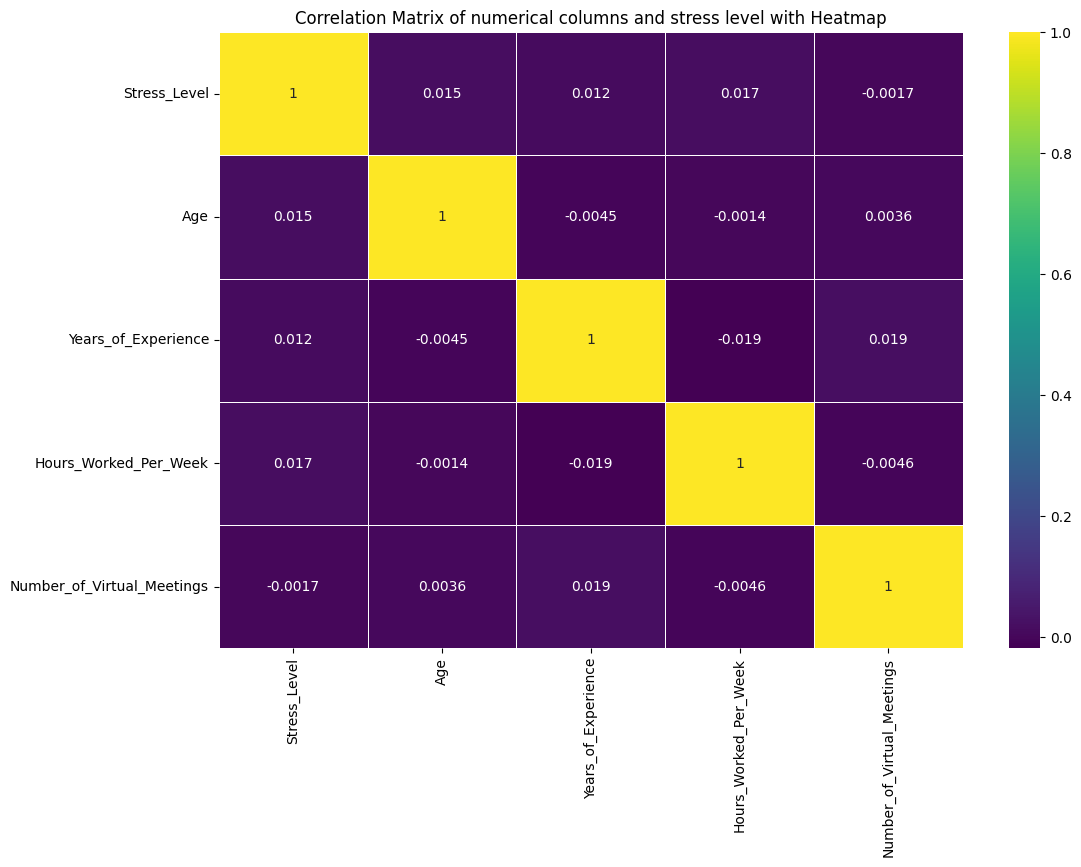

In [2302]:
def map_values(arr):
    mapping = {'Low': 0, 'Medium': 1, 'High': 2}
    return [mapping[value] for value in arr]
df_temp = df.copy()
df_temp["Stress_Level"] = map_values(df_temp["Stress_Level"])
numerical_columns_with_stress_level = ['Stress_Level', 'Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
correlation_matrix = df_temp[numerical_columns_with_stress_level].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)  # Replace 'viridis' with your preferred colormap
plt.title('Correlation Matrix of numerical columns and stress level with Heatmap')
plt.show()

Check the skewness of our numerical columns

In [2303]:
for col in numerical_columns:
    print(f"The columns {col} has skewness of: {df[col].skew()}")

The columns Age has skewness of: -0.020576468482792102
The columns Years_of_Experience has skewness of: 0.007748623083078567
The columns Hours_Worked_Per_Week has skewness of: 0.032315924673659215
The columns Number_of_Virtual_Meetings has skewness of: -0.015123071652481432


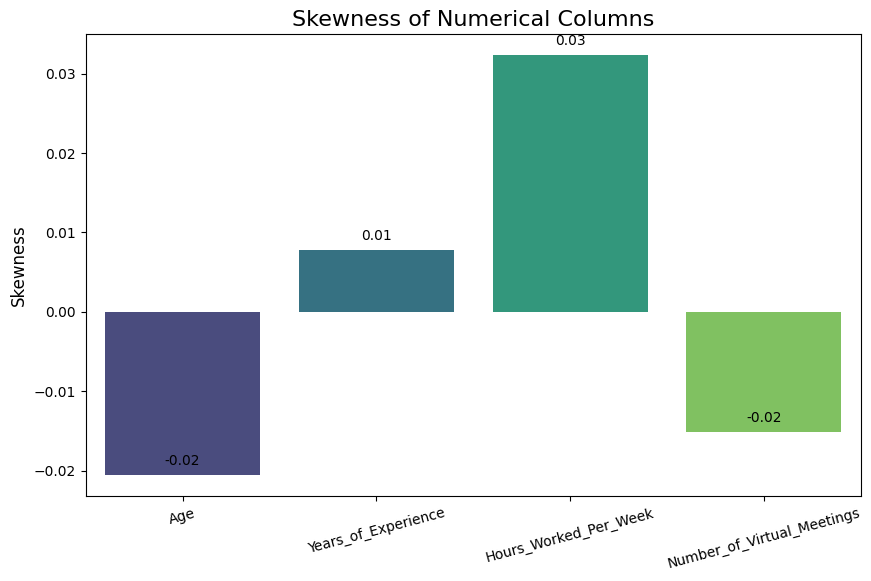

In [2304]:
skewness_data = pd.DataFrame({
    'Column': numerical_columns,
    'Skewness': [df[the_col].skew() for the_col in numerical_columns]
})

# Set up the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Column', y='Skewness', data=skewness_data, palette='viridis')

# Set titles and labels
plt.title('Skewness of Numerical Columns', fontsize=16)
plt.xlabel(None)
plt.ylabel('Skewness', fontsize=12)
plt.xticks(rotation=15) 
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset text by 5 points
                      textcoords='offset points')

# Show the plot
plt.show()

From the plots above, we can conclude that all of our numerical columns are normal.

# **v. Feature Engineering**

Here, we will do exploratory data analysis to understand the data better, what can we get from the data, and lastly to see if we need to do extra step to extract more information in the Feature Engineering step.

## 1. Cardinality Check

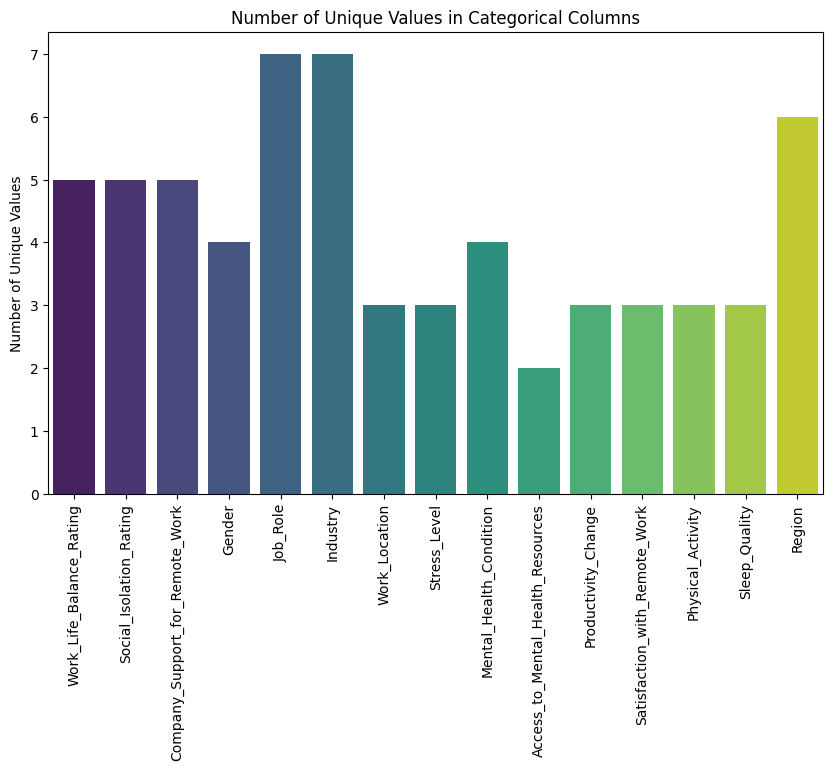

In [2305]:
cat_columns = ["Work_Life_Balance_Rating", "Social_Isolation_Rating", "Company_Support_for_Remote_Work", 
               "Gender", "Job_Role", "Industry", "Work_Location", "Stress_Level", 
               "Mental_Health_Condition", "Access_to_Mental_Health_Resources", "Productivity_Change", 
               "Satisfaction_with_Remote_Work", "Physical_Activity", "Sleep_Quality", "Region"]

# Create a bar plot to visualize the number of unique categories in each categorical column
unique_counts = [len(df[col].unique()) for col in cat_columns]

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_columns, y=unique_counts, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Categorical Columns')
plt.show()

Our categorical columns do not have high cardinality.

## 2. Split between X and y, and train and test

Change the Stress_Level to be numbers, categorical ordinal:
- Low = 0
- Medium = 1
- High = 2

In [2306]:
def map_values(arr):
    mapping = {'Low': 0, 'Medium': 1, 'High': 2}
    return [mapping[value] for value in arr]

In [2307]:
df['Stress_Level'].head()

0    Medium
1    Medium
2    Medium
3      High
4      High
Name: Stress_Level, dtype: object

In [2308]:
df['Stress_Level'] = map_values(df["Stress_Level"])
df['Stress_Level'].head()

0    1
1    1
2    1
3    2
4    2
Name: Stress_Level, dtype: int64

In [2309]:
correlation = df[['Stress_Level', 'Social_Isolation_Rating']].corr(method='spearman')
print(correlation)

                         Stress_Level  Social_Isolation_Rating
Stress_Level                 1.000000                 0.031557
Social_Isolation_Rating      0.031557                 1.000000


In [2310]:
# Split between Features and Target
X = df.drop("Stress_Level", axis=1)
y = df['Stress_Level']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (4000,)
Test Size  :  (1000,)


## 3. Feature Selection

In [2311]:
numerical_columns = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
encoded_columns = ["Work_Life_Balance_Rating", "Social_Isolation_Rating", "Company_Support_for_Remote_Work"]
cat_nominal_columns = ["Gender", "Job_Role", "Industry", "Work_Location", "Access_to_Mental_Health_Resources", "Region"]
cat_ordinal_columns = ["Mental_Health_Condition", "Productivity_Change", "Satisfaction_with_Remote_Work", "Physical_Activity", "Sleep_Quality"]

X_train_num = X_train[numerical_columns]
X_test_num = X_test[numerical_columns]

X_train_cat_nominal = X_train[cat_nominal_columns]
X_test_cat_nominal = X_test[cat_nominal_columns]

X_train_cat_ordinal = X_train[cat_ordinal_columns]
X_test_cat_ordinal = X_test[cat_ordinal_columns]

X_train_encoded = X_train[encoded_columns]
X_test_encoded = X_test[encoded_columns]

We will use StandardScaler for our numerical columns, as all of them are normal distributions, OneHotEncoder for all nominal categorical columns and OrdinalEncoder for all ordinal categorical columns.

In [2312]:
# Numerical pipeline
num_pipeline = Pipeline([                    
    ('standard_scaler', StandardScaler())
])

# Cat pipeline
cat_nominal_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

cat_ordinal_pipeline = Pipeline([
        ('ordinal_encoder', OrdinalEncoder(categories=[
            ["Normal", "Anxiety", "Depression", "Burnout"],
            ["Decrease", "No Change", "Increase"],
            ["Unsatisfied", "Neutral", "Satisfied"],
            ["None", "Weekly", "Daily"],
            ["Poor", "Average", "Good"],
        ])),
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
    ('pipe_num', num_pipeline, numerical_columns),
    ('pipe_cat_nominal', cat_nominal_pipeline, cat_nominal_columns),
    ('pipe_cat_ordinal', cat_ordinal_pipeline, cat_ordinal_columns)
])

preprocessing_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('standard_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'Years_of_Experience',
                                  'Hours_Worked_Per_Week',
                                  'Number_of_Virtual_Meetings']),
                                ('pipe_cat_nominal',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'Job_Role', 'Industry',
                                  'Work_Location',
                                  'A...
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Normal',
                                                                              'Anxiety',
                                                                              'Depression',
                                                                              'Burnout'],
                                                                             ['Decrease',
                                                                              'No '
                                                                              'Change',
                                                                              'Increase'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied'],
                                                                             ['None',
                                                                              'Weekly',
                                                                              'Daily'],
                                                                             ['Poor',
                                                                              'Average',
                                                                              'Good']]))]),
                                 ['Mental_Health_Condition',
                                  'Productivity_Change',
                                  'Satisfaction_with_Remote_Work',
                                  'Physical_Activity', 'Sleep_Quality'])])

# vi. Model Definition and Training

## 1. Using KNN

In [2313]:
knn_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', KNeighborsClassifier(n_neighbors=3)) 
])

knn_model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years_of_Experience',
                                                   'Hours_Worked_Per_Week',
                                                   'Number_of_Virtual_Meetings']),
                                                 ('pipe_cat_nominal',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Job_Rol...
                                                                   OrdinalEncoder(categories=[['Normal',
                                                                                               'Anxiety',
                                                                                               'Depression',
                                                                                               'Burnout'],
                                                                                              ['Decrease',
                                                                                               'No '
                                                                                               'Change',
                                                                                               'Increase'],
                                                                                              ['Unsatisfied',
                                                                                               'Neutral',
                                                                                               'Satisfied'],
                                                                                              ['None',
                                                                                               'Weekly',
                                                                                               'Daily'],
                                                                                              ['Poor',
                                                                                               'Average',
                                                                                               'Good']]))]),
                                                  ['Mental_Health_Condition',
                                                   'Productivity_Change',
                                                   'Satisfaction_with_Remote_Work',
                                                   'Physical_Activity',
                                                   'Sleep_Quality'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [2314]:
knn_model_pipeline.fit(X_train, y_train)

# Predict Train and test

y_pred_train = knn_model_pipeline.predict(X_train)
y_pred_test = knn_model_pipeline.predict(X_test)
y_pred_proba_test = knn_model_pipeline.predict_proba(X_test)

In [2315]:
roc_auc = roc_auc_score(y_test, y_pred_proba_test, average='macro', multi_class='ovr')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

# Generate classification report
test_report = classification_report(y_test, y_pred_test, target_names=['Low', 'Medium', 'High'])
train_report = classification_report(y_train, y_pred_train, target_names=['Low', 'Medium', 'High'])

# Print metrics
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'F1 Score (Macro): {f1:.4f}')
print('Test Classification Report:\n', test_report)
print('Train Classification Report:\n', train_report)

ROC AUC Score: 0.5018
F1 Score (Macro): 0.3234
Test Classification Report:
               precision    recall  f1-score   support

         Low       0.33      0.52      0.41       322
      Medium       0.33      0.25      0.29       332
        High       0.33      0.24      0.28       346

    accuracy                           0.33      1000
   macro avg       0.33      0.34      0.32      1000
weighted avg       0.33      0.33      0.32      1000

Train Classification Report:
               precision    recall  f1-score   support

         Low       0.53      0.75      0.62      1323
      Medium       0.71      0.57      0.63      1337
        High       0.70      0.55      0.62      1340

    accuracy                           0.62      4000
   macro avg       0.65      0.62      0.62      4000
weighted avg       0.65      0.62      0.62      4000



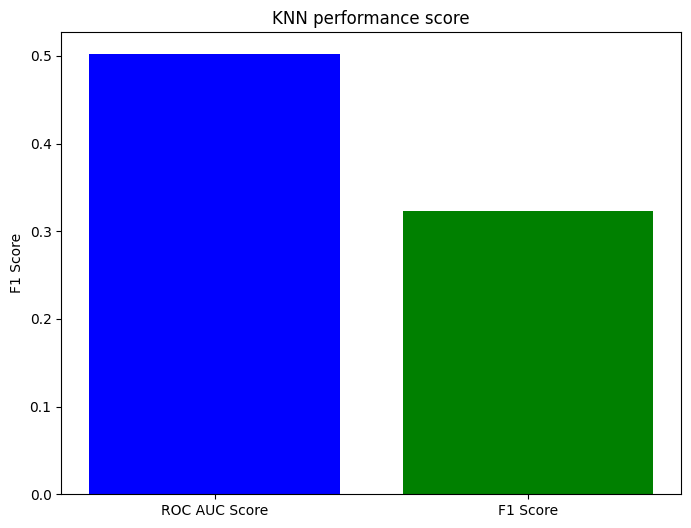

In [2316]:
labels = ['ROC AUC Score', 'F1 Score']
f1_scores = [roc_auc, f1]
plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores, color=['blue', 'green'])

plt.title('KNN performance score')
plt.ylabel('F1 Score')

plt.show()

Cross validation score

In [2317]:
cross_val_knn = cross_val_score(knn_model_pipeline,
                                X_train,
                                y_train,
                                cv=3,
                                scoring="neg_mean_absolute_error")

print('F1 Score - All - Cross Validation  :', cross_val_knn.tolist())
print('F1 Score - Mean - Cross Validation :', cross_val_knn.mean())
print('F1 Score - Std - Cross Validation  :', cross_val_knn.std())
print('F1 Score - Range of Test-Set       :', (cross_val_knn.mean() - cross_val_knn.std()) , '-', (cross_val_knn.mean() + cross_val_knn.std()))

F1 Score - All - Cross Validation  : [-0.967016491754123, -0.9564891222805701, -0.9392348087021756]
F1 Score - Mean - Cross Validation : -0.9542468075789562
F1 Score - Std - Cross Validation  : 0.011452116535544007
F1 Score - Range of Test-Set       : -0.9656989241145002 - -0.9427946910434122


Conclusion: The KNN algorithm doesn't yield a good result, as the ROC AUC score is 0.5018. It means, it has poor generalization and the model's ability to distinguish between classes is similar to random guessing. The macro F1 score averages the F1 scores across all classes, treating each class equally. A score of 0.3234 is quite low, indicating that the model is not doing well in terms of balancing precision and recall across the different classes. This means that the model struggles to correctly classify the different categories, especially "Medium" and "High".

## 2. Using SVM

### a. SVM Linear

In [2318]:
svm_linear_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='linear')) 
])

svm_linear_model_pipeline.fit(X_train, y_train);

`linear` with hyperparameter tuning

In [2319]:
svm_linear_model_tuning_1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='linear', C=500, gamma=0.1)) 
])

svm_linear_model_tuning_100_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='linear', C=500, gamma=100)) 
])

svm_linear_model_tuning_1_pipeline.fit(X_train, y_train);
svm_linear_model_tuning_100_pipeline.fit(X_train, y_train);

### b. SVM Polynomial

In [2320]:
svm_poly_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='poly')) 
])

svm_poly_model_pipeline.fit(X_train, y_train);

Polynomial with Hyperparameter Tuning

In [2321]:
svm_poly_model_tuning_1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='poly', C=500, gamma=0.1)) 
])

svm_poly_model_tuning_100_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='poly', C=500, gamma=100)) 
])

svm_poly_model_tuning_1_pipeline.fit(X_train, y_train);
svm_poly_model_tuning_100_pipeline.fit(X_train, y_train);

### c. SVM RBF

In [2322]:
svm_rbf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='rbf')) 
])

svm_rbf_model_pipeline.fit(X_train, y_train);

RBF with Hyperparameter Tuning

In [2323]:
svm_rbf_model_tuning_1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='rbf', C=500, gamma=0.1)) 
])

svm_rbf_model_tuning_100_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', SVC(kernel='rbf', C=500, gamma=100)) 
])

svm_rbf_model_tuning_1_pipeline.fit(X_train, y_train);
svm_rbf_model_tuning_100_pipeline.fit(X_train, y_train);

In [2324]:
# Model Evaluation
def performance_check_model(clf, X, y):
  y_pred = clf.predict(X)
  return f1_score(y, y_pred, average='macro')

def check_cross_val_score(pipeline, give_space = False):
  cross_val = cross_val_score(pipeline,
                                X_train,
                                y_train,
                                cv=3,
                                scoring="neg_mean_absolute_error")
  if give_space:
    print("")
  print("Cross validation scores")
  print('F1 Score - All - Cross Validation  :', cross_val.tolist())
  print('F1 Score - Mean - Cross Validation :', cross_val.mean())
  print('F1 Score - Std - Cross Validation  :', cross_val.std())
  print('F1 Score - Range of Test-Set       :', (cross_val.mean() - cross_val.std()) , '-', (cross_val.mean() + cross_val.std()))

Performance check for `linear` model

In [2325]:
linear_model_result_train = performance_check_model(svm_linear_model_pipeline, X_train, y_train)
linear_model_result_test = performance_check_model(svm_linear_model_pipeline, X_test, y_test)

print("\nWithout hyperparameter tuning")
check_cross_val_score(svm_linear_model_pipeline)
print('Train : ', linear_model_result_train)
print('Test  : ', linear_model_result_test)

linear_model_tuning_1_result_train = performance_check_model(svm_linear_model_tuning_1_pipeline, X_train, y_train)
linear_model_tuning_1_result_test = performance_check_model(svm_linear_model_tuning_1_pipeline, X_test, y_test)

print("\nWith Hyperparameter tuning C = 500 and gamma = 0.1")
check_cross_val_score(svm_linear_model_tuning_1_pipeline)
print('Train : ', linear_model_tuning_1_result_train)
print('Test  : ', linear_model_tuning_1_result_test)

linear_model_tuning_100_result_train = performance_check_model(svm_linear_model_tuning_100_pipeline, X_train, y_train)
linear_model_tuning_100_result_test = performance_check_model(svm_linear_model_tuning_100_pipeline, X_test, y_test)

print("\nWith Hyperparameter tuning C = 500 and gamma = 100")
check_cross_val_score(svm_linear_model_tuning_100_pipeline)
print('Train : ', linear_model_tuning_100_result_train)
print('Test  : ', linear_model_tuning_100_result_test)


Without hyperparameter tuning
Cross validation scores
F1 Score - All - Cross Validation  : [-0.8740629685157422, -0.8687171792948237, -0.9092273068267067]
F1 Score - Mean - Cross Validation : -0.8840024848790908
F1 Score - Std - Cross Validation  : 0.017969661419835997
F1 Score - Range of Test-Set       : -0.9019721462989269 - -0.8660328234592548
Train :  0.37177673328759436
Test  :  0.34451959672113414

With Hyperparameter tuning C = 500 and gamma = 0.1
Cross validation scores
F1 Score - All - Cross Validation  : [-0.8718140929535232, -0.873218304576144, -0.9099774943735934]
F1 Score - Mean - Cross Validation : -0.8850032973010867
F1 Score - Std - Cross Validation  : 0.0176687264610398
F1 Score - Range of Test-Set       : -0.9026720237621265 - -0.867334570840047
Train :  0.3730259486393563
Test  :  0.3484990058012582

With Hyperparameter tuning C = 500 and gamma = 100
Cross validation scores
F1 Score - All - Cross Validation  : [-0.8718140929535232, -0.873218304576144, -0.90997749437

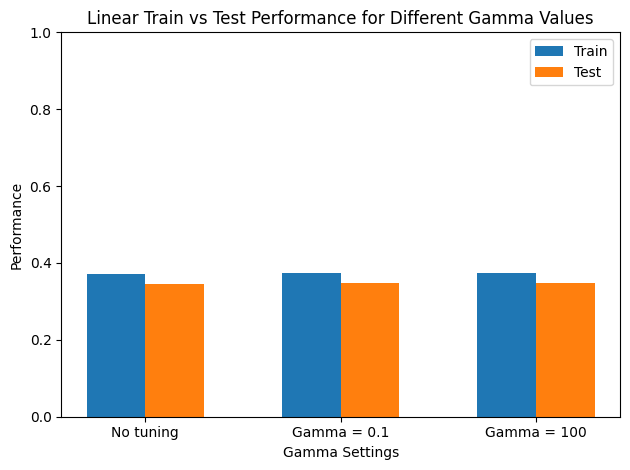

In [2326]:
data_linear = [
    {
        "without_hyperparameter_train": linear_model_result_train,
        "without_hyperparameter_test": linear_model_result_test,
    },
    {
        "with_gamma_1_train": linear_model_tuning_1_result_train,
        "with_gamma_1_test": linear_model_tuning_1_result_test,
    },
    {
        "with_gamma_100_train": linear_model_tuning_100_result_train,
        "with_gamma_100_test": linear_model_tuning_100_result_test
    }
]

def show_train_test_plot(data, with_max_y, title):
    train_performance = [data[0]['without_hyperparameter_train'], data[1]['with_gamma_1_train'], data[2]['with_gamma_100_train']]
    test_performance = [data[0]['without_hyperparameter_test'], data[1]['with_gamma_1_test'], data[2]['with_gamma_100_test']]

    # X-axis labels and positions
    labels = ['No tuning', 'Gamma = 0.1', 'Gamma = 100']
    x = np.arange(len(labels))

    # Bar width
    width = 0.3

    # Create the plot
    fig, ax = plt.subplots()

    # Plot bars for train and test performance
    bar1 = ax.bar(x - width/2, train_performance, width, label='Train')
    bar2 = ax.bar(x + width/2, test_performance, width, label='Test')

    # Add labels and title
    ax.set_xlabel('Gamma Settings')
    ax.set_ylabel('Performance')
    ax.set_title(f'{title} Train vs Test Performance for Different Gamma Values')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    if with_max_y:
        plt.ylim(0, 1)
    # Show the plot
    plt.tight_layout()
    plt.show()

show_train_test_plot(data_linear, True, "Linear")

Performance check for `polynomial` model

In [2327]:
poly_model_result_train = performance_check_model(svm_poly_model_pipeline, X_train, y_train)
poly_model_result_test = performance_check_model(svm_poly_model_pipeline, X_test, y_test)

print("\nWithout hyperparameter tuning")
check_cross_val_score(svm_poly_model_pipeline)
print('Train : ', poly_model_result_train)
print('Test  : ', poly_model_result_test)

poly_model_tuning_1_result_train = performance_check_model(svm_poly_model_tuning_1_pipeline, X_train, y_train)
poly_model_tuning_1_result_test = performance_check_model(svm_poly_model_tuning_1_pipeline, X_test, y_test)

print("\nWith Hyperparameter tuning C = 500 and gamma = 0.1")
check_cross_val_score(svm_poly_model_tuning_1_pipeline)
print('Train : ', poly_model_tuning_1_result_train)
print('Test  : ', poly_model_tuning_1_result_test)

poly_model_tuning_100_result_train = performance_check_model(svm_poly_model_tuning_100_pipeline, X_train, y_train)
poly_model_tuning_100_result_test = performance_check_model(svm_poly_model_tuning_100_pipeline, X_test, y_test)

print("\nWith Hyperparameter tuning C = 500 and gamma = 100")
check_cross_val_score(svm_poly_model_tuning_100_pipeline)
print('Train : ', poly_model_tuning_100_result_train)
print('Test  : ', poly_model_tuning_100_result_test)


Without hyperparameter tuning
Cross validation scores
F1 Score - All - Cross Validation  : [-0.9115442278860569, -0.9024756189047262, -0.891972993248312]
F1 Score - Mean - Cross Validation : -0.9019976133463651
F1 Score - Std - Cross Validation  : 0.007997069183844149
F1 Score - Range of Test-Set       : -0.9099946825302092 - -0.894000544162521
Train :  0.6406203948997595
Test  :  0.30117381790516573

With Hyperparameter tuning C = 500 and gamma = 0.1
Cross validation scores
F1 Score - All - Cross Validation  : [-0.9265367316341829, -0.8979744936234059, -0.9174793698424606]
F1 Score - Mean - Cross Validation : -0.9139968650333499
F1 Score - Std - Cross Validation  : 0.01191766867177132
F1 Score - Range of Test-Set       : -0.9259145337051212 - -0.9020791963615785
Train :  1.0
Test  :  0.35229604162610695

With Hyperparameter tuning C = 500 and gamma = 100
Cross validation scores
F1 Score - All - Cross Validation  : [-0.9265367316341829, -0.8979744936234059, -0.9174793698424606]
F1 Sco

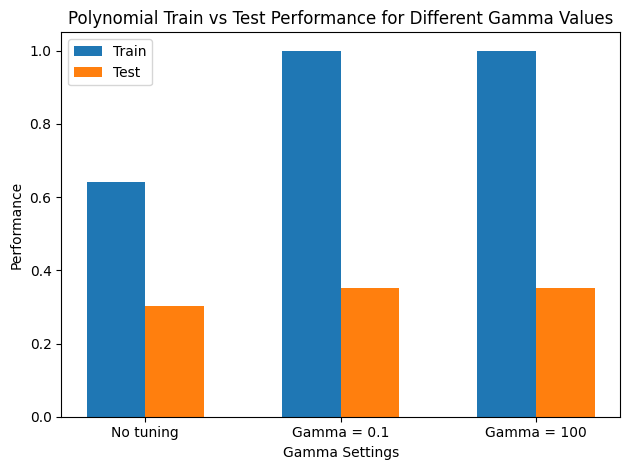

In [2328]:
data_poly = [
    {
        "without_hyperparameter_train": poly_model_result_train,
        "without_hyperparameter_test": poly_model_result_test,
    },
    {
        "with_gamma_1_train": poly_model_tuning_1_result_train,
        "with_gamma_1_test": poly_model_tuning_1_result_test,
    },
    {
        "with_gamma_100_train": poly_model_tuning_100_result_train,
        "with_gamma_100_test": poly_model_tuning_100_result_test
    }
]

show_train_test_plot(data_poly, False, "Polynomial")

Performance check for `RBF` model

In [2329]:
rbf_model_result_train = performance_check_model(svm_rbf_model_pipeline, X_train, y_train)
rbf_model_result_test = performance_check_model(svm_rbf_model_pipeline, X_test, y_test)

print("Without hyperparameter tuning")
check_cross_val_score(svm_rbf_model_pipeline)
print('Train : ', rbf_model_result_train)
print('Test  : ', rbf_model_result_test)

rbf_model_tuning_1_result_train = performance_check_model(svm_rbf_model_tuning_1_pipeline, X_train, y_train)
rbf_model_tuning_1_result_test = performance_check_model(svm_rbf_model_tuning_1_pipeline, X_test, y_test)

print("\nWith Hyperparameter tuning C = 500 and gamma = 0.1")
check_cross_val_score(svm_rbf_model_tuning_1_pipeline)
print('Train : ', rbf_model_tuning_1_result_train)
print('Test  : ', rbf_model_tuning_1_result_test)

rbf_model_tuning_100_result_train = performance_check_model(svm_rbf_model_tuning_100_pipeline, X_train, y_train)
rbf_model_tuning_100_result_test = performance_check_model(svm_rbf_model_tuning_100_pipeline, X_test, y_test)

print("\nWith Hyperparameter tuning C = 500 and gamma = 100")
check_cross_val_score(svm_rbf_model_tuning_100_pipeline)
print('Train : ', rbf_model_tuning_100_result_train)
print('Test  : ', rbf_model_tuning_100_result_test)

Without hyperparameter tuning
Cross validation scores
F1 Score - All - Cross Validation  : [-0.9025487256371814, -0.891972993248312, -0.900225056264066]
F1 Score - Mean - Cross Validation : -0.8982489250498532
F1 Score - Std - Cross Validation  : 0.004538013502410117
F1 Score - Range of Test-Set       : -0.9027869385522633 - -0.8937109115474431
Train :  0.5717812893186499
Test  :  0.3204817353122344

With Hyperparameter tuning C = 500 and gamma = 0.1
Cross validation scores
F1 Score - All - Cross Validation  : [-0.9212893553223388, -0.8964741185296324, -0.9017254313578394]
F1 Score - Mean - Cross Validation : -0.9064963017366036
F1 Score - Std - Cross Validation  : 0.01067769942130946
F1 Score - Range of Test-Set       : -0.917174001157913 - -0.8958186023152941
Train :  1.0
Test  :  0.33404674385287

With Hyperparameter tuning C = 500 and gamma = 100
Cross validation scores
F1 Score - All - Cross Validation  : [-0.9955022488755623, -0.9954988747186797, -0.9962490622655664]
F1 Score - M

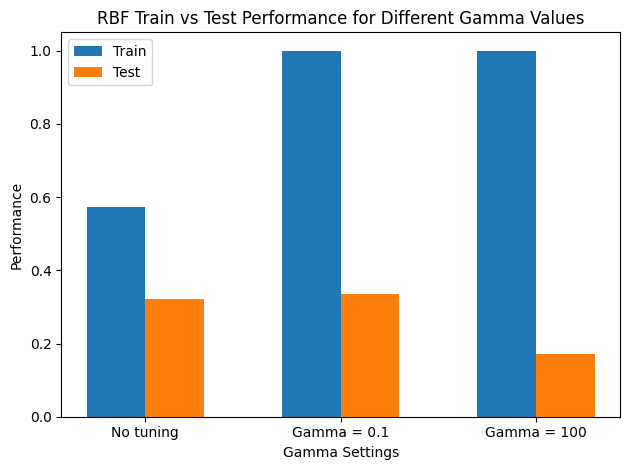

In [2330]:
data_rbf = [
    {
        "without_hyperparameter_train": rbf_model_result_train,
        "without_hyperparameter_test": rbf_model_result_test,
    },
    {
        "with_gamma_1_train": rbf_model_tuning_1_result_train,
        "with_gamma_1_test": rbf_model_tuning_1_result_test,
    },
    {
        "with_gamma_100_train": rbf_model_tuning_100_result_train,
        "with_gamma_100_test": rbf_model_tuning_100_result_test
    }
]

show_train_test_plot(data_rbf, False, "RBF")

From all the scores above, we can safely conclude that SVM RBF without hyperparameter tuning yields the best result among other models. The F1 score on the training set is much higher compared to the test set. A score of 0.5717812893186499 indicates that the model performs reasonably well on the training data, though there is room for improvement. The F1 score on the test set is much lower, at 0.3204817353122344, indicating a significant drop in performance when the model is applied to unseen data. This suggests that the model is overfitting, i.e., it performs well on the training data but fails to generalize to new data. For the `RBF` and `Polynomial` models, with hyperparameter tuning, the train score is 1.0, which indicates overfitting, hence why it's not the best model.

## 3. Using Decision Tree

In [2331]:
decision_tree_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', DecisionTreeClassifier(max_depth=6, random_state=10)) 
])

decision_tree_model_pipeline.fit(X_train, y_train);

Cross validation scores
F1 Score - All - Cross Validation  : [-0.9175412293853074, -0.9422355588897224, -0.8912228057014253]
F1 Score - Mean - Cross Validation : -0.9169998646588183
F1 Score - Std - Cross Validation  : 0.020829387153536136
F1 Score - Range of Test-Set       : -0.9378292518123544 - -0.8961704775052822

Decision Tree - Train


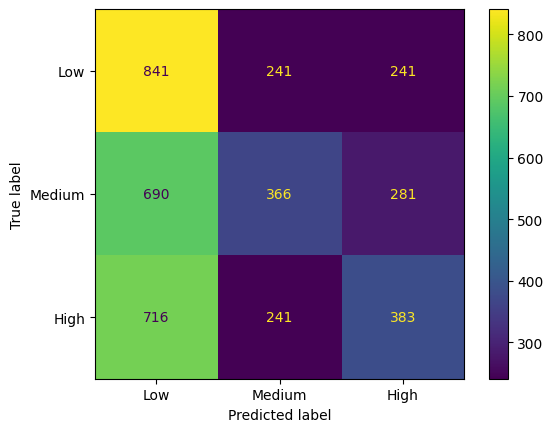

              precision    recall  f1-score   support

         Low       0.37      0.64      0.47      1323
      Medium       0.43      0.27      0.34      1337
        High       0.42      0.29      0.34      1340

    accuracy                           0.40      4000
   macro avg       0.41      0.40      0.38      4000
weighted avg       0.41      0.40      0.38      4000


Decision Tree - Test


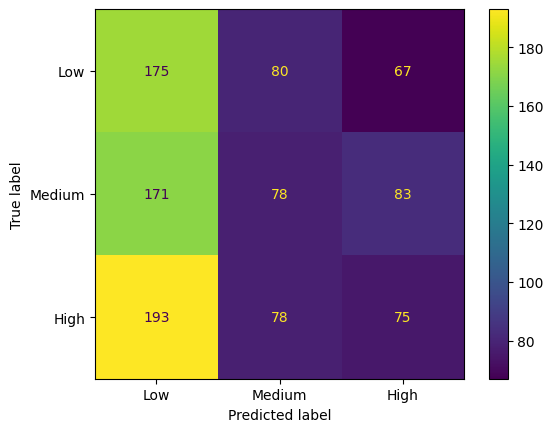

              precision    recall  f1-score   support

         Low       0.32      0.54      0.41       322
      Medium       0.33      0.23      0.27       332
        High       0.33      0.22      0.26       346

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.31      1000
weighted avg       0.33      0.33      0.31      1000



In [2332]:
def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

check_cross_val_score(decision_tree_model_pipeline)
print('\nDecision Tree - Train')
performance_check(decision_tree_model_pipeline, X_train, y_train, ["Low", "Medium", "High"])
print('')

print('Decision Tree - Test')
performance_check(decision_tree_model_pipeline, X_test, y_test, ["Low", "Medium", "High"])

Using the Decision Tree, the model doesn't seem to predict quite well. From the precision, we can see that of all instances predicted as "Low", only 32% were correct. From the recall 54%, the model correctly identified 54% of the actual "Low" instances, meaning it's fairly good at capturing the "Low" class. For "Medium" and "High", however, 33% of instances predicted as "Medium" were correct, and 33% of instances predicted as "High" were correct. For the recall, the model correctly identified 23% of actual "Medium" instances, indicating that it struggles to classify this class. Same thing with "High" instances, it has a recall value of 22% which is quite low.

Overall, this model doesn't seem to predict that well.

## 4. Using Random Forest

In [2333]:
random_forest_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', RandomForestClassifier(n_estimators=200, random_state=39)) 
])

random_forest_model_pipeline.fit(X_train, y_train);

In [2334]:
pred_train = random_forest_model_pipeline.predict_proba(X_train)
pred_test = random_forest_model_pipeline.predict_proba(X_test)

# Compute the ROC AUC score for multi-class
roc_auc_train = roc_auc_score(y_train, pred_train, multi_class='ovr')
roc_auc_test = roc_auc_score(y_test, pred_test, multi_class='ovr')

print('Train set - Random Forests roc-auc: {}'.format(roc_auc_train))
print('Test set  - Random Forests roc-auc: {}'.format(roc_auc_test))
check_cross_val_score(random_forest_model_pipeline, True)

Train set - Random Forests roc-auc: 1.0
Test set  - Random Forests roc-auc: 0.5157149485217684

Cross validation scores
F1 Score - All - Cross Validation  : [-0.8898050974512743, -0.9017254313578394, -0.8792198049512379]
F1 Score - Mean - Cross Validation : -0.8902501112534505
F1 Score - Std - Cross Validation  : 0.009193270471798966
F1 Score - Range of Test-Set       : -0.8994433817252495 - -0.8810568407816516


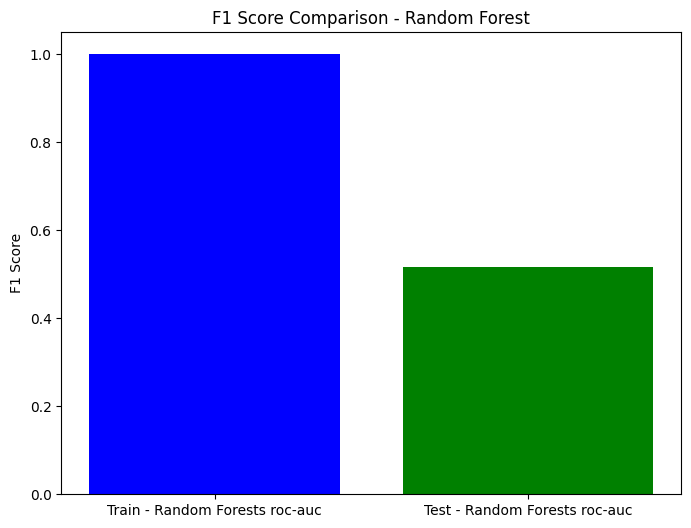

In [2335]:
labels = ['Train - Random Forests roc-auc', 'Test - Random Forests roc-auc']
f1_scores = [roc_auc_train, roc_auc_test]
plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores, color=['blue', 'green'])

plt.title('F1 Score Comparison - Random Forest')
plt.ylabel('F1 Score')

plt.show()

Using Random Forest model, we can clearly see that the model is overfitting, as it shows that the train set ROC AUC has a score of 1.0, combined with the test set score of 0.5157. This is likely due to the complexity of the Random Forest model—it's able to fit perfectly to the training data but fails to generalize to unseen data. The very low test set ROC AUC score (0.5157) and negative F1 scores indicate that the model is struggling with generalization. It doesn't appear to be learning meaningful patterns in the training data that transfer well to new data. Even if the F1 score calculation is corrected, the low values suggest that the model has trouble balancing precision and recall across the different classes ("Low," "Medium," "High"). This could indicate that the Random Forest model struggles with class overlap or class imbalance in your data.

In conclusion, the Random Forest model is overfitting to the training data and is not generalizing well to the test data.

## 5. Using Boosting

In [2336]:
boosting_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', AdaBoostClassifier(
        SVC(kernel='rbf', probability=True, random_state=42),
        n_estimators=30,
        random_state=42)) 
])

boosting_model_pipeline.fit(X_train, y_train);

In [2337]:
# Model Evaluation

y_train_pred = boosting_model_pipeline.predict(X_train)
y_test_pred = boosting_model_pipeline.predict(X_test)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.20620545463678105
F1 Score - Test - AdaBoost  :  0.25066618800665597


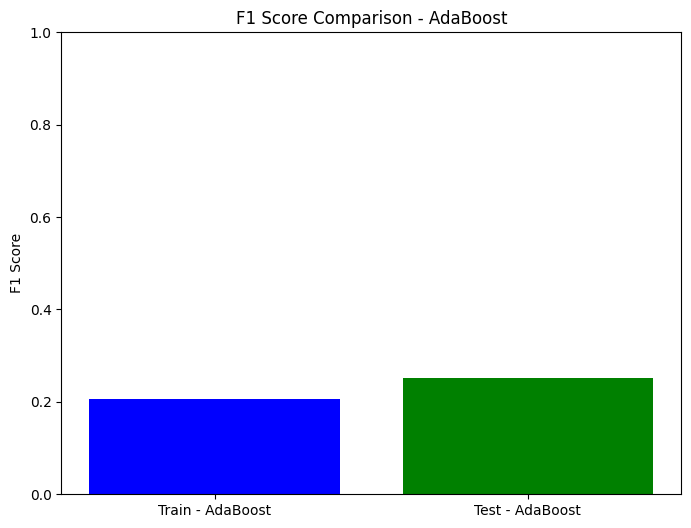

In [2338]:
labels = ['Train - AdaBoost', 'Test - AdaBoost']
f1_scores = [f1_score(y_train, y_train_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')]
plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores, color=['blue', 'green'])

plt.title('F1 Score Comparison - AdaBoost')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.show()

From the results above, we can see that using AdaBoostClassifier on SVC model with kernel `rbf` does not make the model perform better than the base model. We will not be using this boosting.

## 6. Hyperparameter Tuning

In [2339]:
param_distributions = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-4, 1, 6),
}

Let's try hyperparameter tuning without any param_distributions

In [2340]:
svc = SVC(kernel='rbf', probability=True)
random_search_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', RandomizedSearchCV(estimator=svc,
                                 param_distributions={},
                                 n_iter=50,  # Number of random samples
                                 cv=5,  # 3-fold cross-validation
                                 verbose=1,
                                 random_state=42,
                                 n_jobs=-1)) 
])
random_search_pipeline.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


F1 Score - Test Set   :  0.3204817353122344 

Classification Report : 
               precision    recall  f1-score   support

           0       0.32      0.33      0.33       322
           1       0.30      0.29      0.29       332
           2       0.34      0.35      0.34       346

    accuracy                           0.32      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.32      0.32      0.32      1000
 

F1 Score - Train Set   :  0.5717812893186499 

Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.57      0.56      1323
           1       0.59      0.57      0.58      1337
           2       0.56      0.58      0.57      1340

    accuracy                           0.57      4000
   macro avg       0.57      0.57      0.57      4000
weighted avg       0.57      0.57      0.57      4000
 

Confusion Matrix      : 


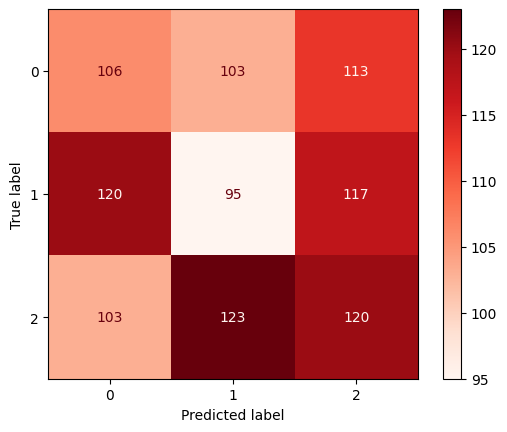

In [2341]:
y_pred_test = random_search_pipeline.predict(X_test)
y_pred_train = random_search_pipeline.predict(X_train)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

print('F1 Score - Train Set   : ', f1_score(y_train, y_pred_train, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_search_pipeline, X_test, y_test, cmap='Reds'))

Let's compare by visualizations with the base model

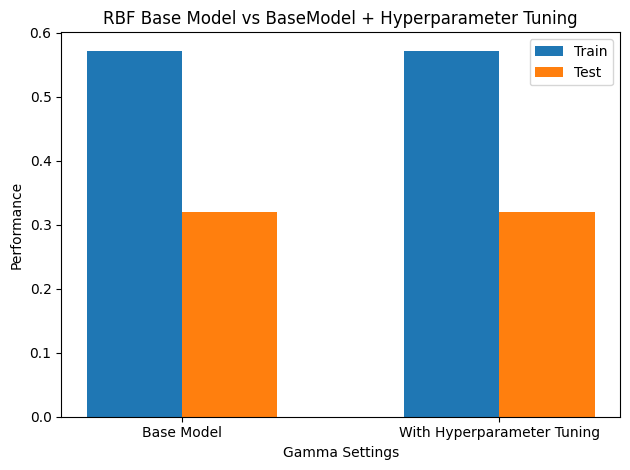

In [2342]:
data_rbf_2 = [
    {
        "base_model_train": rbf_model_result_train,
        "base_model_test": rbf_model_result_test,
    },
    {
        "hyperparameter_train": f1_score(y_train, y_pred_train, average='macro'),
        "hyperparameter_test": f1_score(y_test, y_pred_test, average='macro'),
    }
]

def show_train_test_plot_rbf(data, with_max_y, title):
    train_performance = [data[0]['base_model_train'], data[1]['hyperparameter_train']]
    test_performance = [data[0]['base_model_test'], data[1]['hyperparameter_test']]

    # X-axis labels and positions
    labels = ['Base Model', 'With Hyperparameter Tuning']
    x = np.arange(len(labels))

    # Bar width
    width = 0.3

    # Create the plot
    fig, ax = plt.subplots()

    # Plot bars for train and test performance
    bar1 = ax.bar(x - width/2, train_performance, width, label='Train')
    bar2 = ax.bar(x + width/2, test_performance, width, label='Test')

    # Add labels and title
    ax.set_xlabel('Gamma Settings')
    ax.set_ylabel('Performance')
    ax.set_title(f'{title} Base Model vs BaseModel + Hyperparameter Tuning')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    if with_max_y:
        plt.ylim(0, 1)
    # Show the plot
    plt.tight_layout()
    plt.show()

show_train_test_plot_rbf(data_rbf_2, False, "RBF")

The result is the same than without using hyperparameter tuning. Now let's try with param_distributions

In [2343]:
svc_2 = SVC(kernel='rbf', probability=True)
random_search_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', RandomizedSearchCV(estimator=svc_2,
                                 param_distributions=param_distributions,
                                 n_iter=50,  # Number of random samples
                                 cv=5,  # 3-fold cross-validation
                                 verbose=1,
                                 random_state=42,
                                 n_jobs=-1)) 
])
random_search_pipeline_2.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


F1 Score - Test Set   :  0.3219580428896986 

Classification Report : 
               precision    recall  f1-score   support

           0       0.33      0.36      0.35       322
           1       0.33      0.32      0.32       332
           2       0.31      0.29      0.30       346

    accuracy                           0.32      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.32      0.32      0.32      1000
 

F1 Score - Train Set   :  0.6088938486488781 

Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.61      0.60      1323
           1       0.64      0.60      0.62      1337
           2       0.61      0.61      0.61      1340

    accuracy                           0.61      4000
   macro avg       0.61      0.61      0.61      4000
weighted avg       0.61      0.61      0.61      4000
 

Confusion Matrix      : 


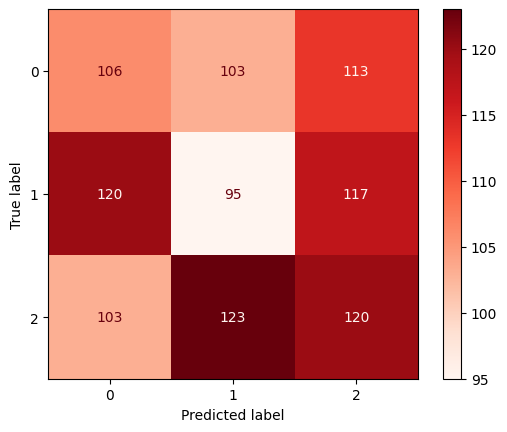

In [2344]:
y_pred_test_2 = random_search_pipeline_2.predict(X_test)
y_pred_train_2 = random_search_pipeline_2.predict(X_train)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_2, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_2), '\n')

print('F1 Score - Train Set   : ', f1_score(y_train, y_pred_train_2, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_search_pipeline, X_test, y_test, cmap='Reds'))

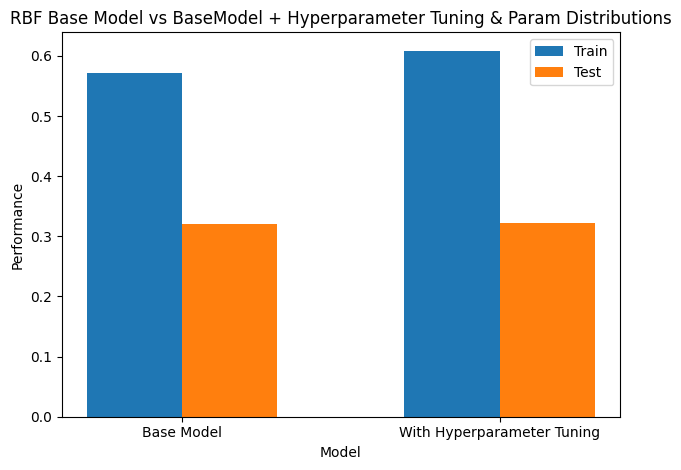

In [2345]:
data_rbf_3 = [
    {
        "base_model_train": rbf_model_result_train,
        "base_model_test": rbf_model_result_test,
    },
    {
        "hyperparameter_train": f1_score(y_train, y_pred_train_2, average='macro'),
        "hyperparameter_test": f1_score(y_test, y_pred_test_2, average='macro'),
    }
]

def show_train_test_plot_rbf(data, with_max_y, title):
    train_performance = [data[0]['base_model_train'], data[1]['hyperparameter_train']]
    test_performance = [data[0]['base_model_test'], data[1]['hyperparameter_test']]

    # X-axis labels and positions
    labels = ['Base Model', 'With Hyperparameter Tuning']
    x = np.arange(len(labels))

    # Bar width
    width = 0.3

    # Create the plot
    fig, ax = plt.subplots()

    # Plot bars for train and test performance
    bar1 = ax.bar(x - width/2, train_performance, width, label='Train')
    bar2 = ax.bar(x + width/2, test_performance, width, label='Test')

    # Add labels and title
    ax.set_xlabel('Model')
    ax.set_ylabel('Performance')
    ax.set_title(f'{title} Base Model vs BaseModel + Hyperparameter Tuning & Param Distributions')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    if with_max_y:
        plt.ylim(0, 1)
    # Show the plot
    plt.tight_layout()
    plt.show()

show_train_test_plot_rbf(data_rbf_3, False, "RBF")

After using the hyperparameter tuning (`RandomizedSearchCV`) with our SVM model (with `rbf` kernel) we can see that there is an increase when using `RandomizedSearchCV` with param_distributions. The F1 score for test set increased slightly and train set increased quite a bit with final value of `0.3219580428896986` for the test set and `0.6088938486488781` for the train set. More over, the precision and recall also increased for the train set. Therefore, for our final model, we will be using this SVM model with `rbf` kernel and the hyperparameter tuning with the param_distributions.

# vii. Conceptual Questions

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging is short for Bootstrap Aggregating. Bagging is used to improve the stability and accuracy of machine learning algorithms, particularly decision trees.

How bagging works:
- Bootstrapping:
    - Random Sampling: Bagging begins by creating several subsets of the original training dataset. Each subset is formed by randomly sampling with replacement from the original dataset. This means some instances may appear multiple times in a subset, while others may not appear at all.
    - Number of Subsets: The number of subsets, or bootstrap samples, can vary but is typically large (e.g., 100 or more).

- Model Training:
    - For each bootstrap sample, a separate model (often a decision tree) is trained independently. Each model learns from a different subset of the data, allowing it to capture different patterns.

- Aggregation:

    - Once all the models have been trained, their predictions are aggregated to produce a final prediction. The method of aggregation depends on the type of problem:
        - For classification tasks, the final prediction is typically made through voting (majority vote) among the individual model predictions.
        - For regression tasks, the final prediction is usually the average of all the model predictions.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Random Forest:
    - Models are trained independently in parallel using bootstrapped samples of the data.
    - Each decision tree is trained on a random subset of features, which introduces diversity among the trees.
    
- AdaBoost:
    - Models are trained sequentially, with each new model trained to correct the errors made by the previous ones.
    - Misclassified instances from the previous model are assigned higher weights, so the next model pays more attention to them.

### 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation is a technique used in machine learning to assess how well a model will generalize to an independent dataset. It involves partitioning the original dataset into multiple subsets or "folds" and systematically evaluating the model's performance on these subsets. Cross-validation helps ensure that the model is not overfitting to the training data and provides a more reliable estimate of its performance on unseen data. Here's a detailed explanation of the concept:

Purpose of Cross-Validation

- Model Evaluation: Cross-validation provides a way to evaluate the performance of a model more robustly than simply splitting the data into a single training and testing set.

- Hyperparameter Tuning: It helps in selecting the best hyperparameters by evaluating how different configurations perform on different data splits.

- Reducing Overfitting: By testing the model on multiple folds, it helps detect overfitting, where a model performs well on training data but poorly on unseen data.

# viii. Model Evaluation

From all the models that we have tried, the best model is `SVM` with `"RBF"` as the kernel argument with `GridSearchCV` as the hyperparameter tuning and using the param_distributions. It has a train score of 0.6088938486488781 and test score of 0.3219580428896986. Although this does not look particularly good, this is the best one yet, as other models either perform worse or are overfitting on the training set.

# ix. Model Saving

In [2346]:
# Save model
with open('model_pipeline.pkl','wb') as file_1: #wb = write binary
    pickle.dump(random_search_pipeline_2,file_1)

with open('preprocessing_pipeline.pkl','wb') as file_2: #wb = write binary
    pickle.dump(preprocessing_pipeline,file_2)

with open('cat_nominal_pipeline.pkl','wb') as file_3: #wb = write binary
    pickle.dump(cat_nominal_pipeline,file_3)

with open('cat_ordinal_pipeline.pkl','wb') as file_4: #wb = write binary
    pickle.dump(cat_ordinal_pipeline,file_4)

with open('num_pipeline.pkl','wb') as file_5: #wb = write binary
    pickle.dump(num_pipeline,file_5)

# Save cols
with open('numerical_col.txt','w') as file_6: #w = write
    json.dump(numerical_columns,file_6)

with open('cat_nominal_col.txt','w') as file_7: #w = write
    json.dump(cat_nominal_columns,file_7)

with open('cat_ordinal_col.txt','w') as file_8: #w = write
    json.dump(cat_ordinal_columns,file_8)

# x. Model Inference

> File: P1M2_stanly_inf.ipynb

# xi. Overall Conclusion

Final conclusion of this project is that:

- The data received from Kaggle is already balanced, as can be seen from the Exploratory Data Analysis, and all the numerical values are normal distributions.

- After experimenting with different models and hyperparameter tuning, it is discovered that SVM model with kernel `rbf` with hyperparameter tuning yields the best result, with final f1_score of 0.3219580428896986 for the test set and 0.6088938486488781 for the train set.

- Using boosting on SVM model with kernel `rbf` actually makes the model perform worse.

- Using the SVM model with kernel `poly` does perform better than kernel `rbf` in terms of train f1_score, but performs a bit worse in test f1_score, hence why kernel `rbf` was chosen. The big difference between train and test score in kernel `poly` indicates the model is overfitting.

- Using Hyperparameter tuning C = 500 and gamma = 0.1 in SVM model with both kernels `rbf` and `poly` results in the f1_score of 1.0 in the train f1_score, which means it's too good to be true and indicates overfitting, hence why these models can be ignored. 

- Although the best model is SVM model with kernel `rbf` with hyperparameter tuning, the final results are still not ideal.

- The numerical columns have low correlation with each other, including with `Stress_Level` hence it could be the reason why the models are performing poorly.

Further Prediction Recommendation:

- Experiment with all the models used above, with different parameters, both in the base model and the hyperparameter tuning.

Further Business Recommendation:

- Obtain more data from employees, as it can help more with the analysis.